# 1/ DATA OVERVIEW

## Set-up

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount to Google Sheets
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define file paths
FILE_PATHS = {
    
    "ITEMS": "/content/drive/MyDrive/Coderschool/Final Project/Raw Data/olist_order_items_dataset.csv",
    "REVIEWS": "/content/drive/MyDrive/Coderschool/Final Project/Raw Data/olist_order_reviews_dataset.csv",
    "ORDERS": "/content/drive/MyDrive/Coderschool/Final Project/Raw Data/olist_orders_dataset.csv",
    "PRODUCTS":"/content/drive/MyDrive/Coderschool/Final Project/Raw Data/olist_products_dataset.csv",
    "GEOLOCATION":"/content/drive/MyDrive/Coderschool/Final Project/Raw Data/olist_geolocation_dataset.csv",
    "SELLERS": "/content/drive/MyDrive/Coderschool/Final Project/Raw Data/olist_sellers_dataset.csv",
    "PAYMENTS": "/content/drive/MyDrive/Coderschool/Final Project/Raw Data/olist_order_payments_dataset.csv",
    "CUSTOMERS": "/content/drive/MyDrive/Coderschool/Final Project/Raw Data/olist_customers_dataset.csv",
    "CATEGORIES": "/content/drive/MyDrive/Coderschool/Final Project/Raw Data/product_category_name_translation.csv"
}

# Load data into dataframes
df_item = pd.read_csv(FILE_PATHS["ITEMS"])
df_reviews = pd.read_csv(FILE_PATHS["REVIEWS"])
df_orders = pd.read_csv(FILE_PATHS["ORDERS"])
df_products = pd.read_csv(FILE_PATHS["PRODUCTS"])
df_geolocation = pd.read_csv(FILE_PATHS["GEOLOCATION"])
df_sellers = pd.read_csv(FILE_PATHS["SELLERS"])
df_order_pay = pd.read_csv(FILE_PATHS["PAYMENTS"])
df_customers = pd.read_csv(FILE_PATHS["CUSTOMERS"])
df_category = pd.read_csv(FILE_PATHS["CATEGORIES"])



In [ ]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
df_order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Data Cleaning

In [ ]:
#Check duplicate, null

datasets = [df_customers, df_geolocation, df_item, df_order_pay, df_reviews, df_orders, df_products, df_sellers, df_category]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]


data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col in data.columns ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [data.duplicated().sum() for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [ ]:
# drop na
# for i in datasets:
#     i.dropna(inplace=True)

=> Leave the null value beside at this time

In [ ]:
# drop duplicate
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [ ]:
# Check again
datasets = [df_customers, df_geolocation, df_item, df_order_pay, df_reviews, df_orders, df_products, df_sellers, df_category]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]


data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col in data.columns ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [data.duplicated().sum() for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",738332,5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [ ]:
# Merge dataframes to create training dataset

merged_df= pd.merge(df_customers, df_orders, on="customer_id")
merged_df= merged_df.merge(df_reviews, on="order_id")
merged_df= merged_df.merge(df_item, on="order_id")
merged_df= merged_df.merge(df_products, on="product_id")
merged_df= merged_df.merge(df_order_pay, on="order_id")
merged_df= merged_df.merge(df_sellers, on='seller_id')
merged_df= merged_df.merge(df_category, on='product_category_name')
merged_df.shape

(115609, 40)

In [ ]:
# summary

merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


## Data quality

In [ ]:
# check uniqueness
merged_df['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

In [ ]:
# Change to time type for below column
time_list = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
             'order_delivered_customer_date','order_estimated_delivery_date', 'review_creation_date',
             'review_answer_timestamp', 'shipping_limit_date']

for i in time_list:
  merged_df[i] = pd.to_datetime(merged_df[i])


In [ ]:
# Check timeliness
merged_df['order_delivered_customer_date'].max()

Timestamp('2018-10-17 13:22:46')

In [ ]:
merged_df['order_delivered_customer_date'].min()

Timestamp('2016-10-11 13:46:32')

=> Data update from 2016 to 2018

In [ ]:
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_delivered_customer_date'].min()

Timestamp('2016-10-11 13:46:32')

In [ ]:
sorted(merged_df['order_delivered_customer_date'].dt.to_period('M').unique())

[Period('2016-10', 'M'),
 Period('2016-11', 'M'),
 Period('2016-12', 'M'),
 Period('2017-01', 'M'),
 Period('2017-02', 'M'),
 Period('2017-03', 'M'),
 Period('2017-04', 'M'),
 Period('2017-05', 'M'),
 Period('2017-06', 'M'),
 Period('2017-07', 'M'),
 Period('2017-08', 'M'),
 Period('2017-09', 'M'),
 Period('2017-10', 'M'),
 Period('2017-11', 'M'),
 Period('2017-12', 'M'),
 Period('2018-01', 'M'),
 Period('2018-02', 'M'),
 Period('2018-03', 'M'),
 Period('2018-04', 'M'),
 Period('2018-05', 'M'),
 Period('2018-06', 'M'),
 Period('2018-07', 'M'),
 Period('2018-08', 'M'),
 NaT,
 Period('2018-09', 'M'),
 Period('2018-10', 'M')]

Data is not enough for year 2016 and 2018

# 2/ EDA

## Olist Performance

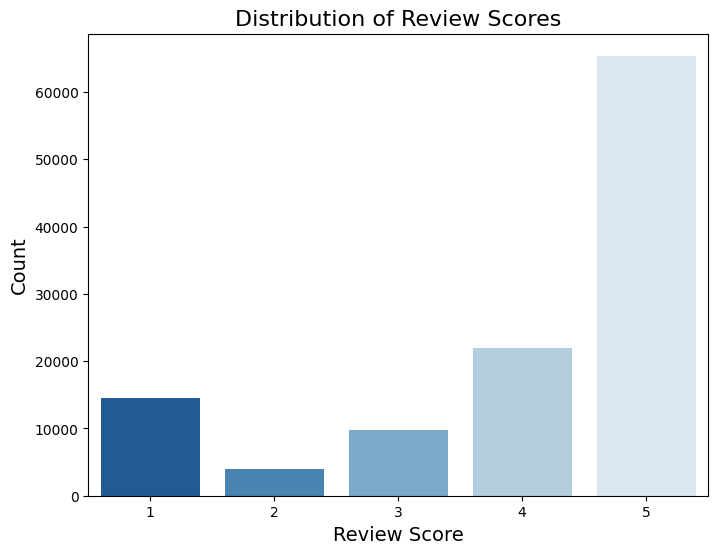

In [ ]:
# Distribution of review scores
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=merged_df, palette='Blues_r')
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
# Number of orders

print('number of orders: ', df_orders['order_id'].nunique())
print('number of customers: ', df_customers['customer_unique_id'].nunique())
print('number of sellers: ', df_sellers['seller_id'].nunique())


number of orders:  99441
number of customers:  96096
number of sellers:  3095


In [ ]:
# grownth rate
growth = merged_df
growth['month_year'] = growth['order_delivered_customer_date'].dt.to_period('M')
growth['month_year'] = growth['month_year'].astype(str)
growth['year'] = growth['order_delivered_customer_date'].dt.year
growth['year'] = growth['year'].astype(str)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2016-10'),
  Text(1, 0, '2016-11'),
  Text(2, 0, '2016-12'),
  Text(3, 0, '2017-01'),
  Text(4, 0, '2017-02'),
  Text(5, 0, '2017-03'),
  Text(6, 0, '2017-04'),
  Text(7, 0, '2017-05'),
  Text(8, 0, '2017-06'),
  Text(9, 0, '2017-07'),
  Text(10, 0, '2017-08'),
  Text(11, 0, '2017-09'),
  Text(12, 0, '2017-10'),
  Text(13, 0, '2017-11'),
  Text(14, 0, '2017-12'),
  Text(15, 0, '2018-01'),
  Text(16, 0, '2018-02'),
  Text(17, 0, '2018-03'),
  Text(18, 0, '2018-04'),
  Text(19, 0, '2018-05'),
  Text(20, 0, '2018-06'),
  Text(21, 0, '2018-07'),
  Text(22, 0, '2018-08'),
  Text(23, 0, '2018-09'),
  Text(24, 0, '2018-10'),
  Text(25, 0, 'NaT')])

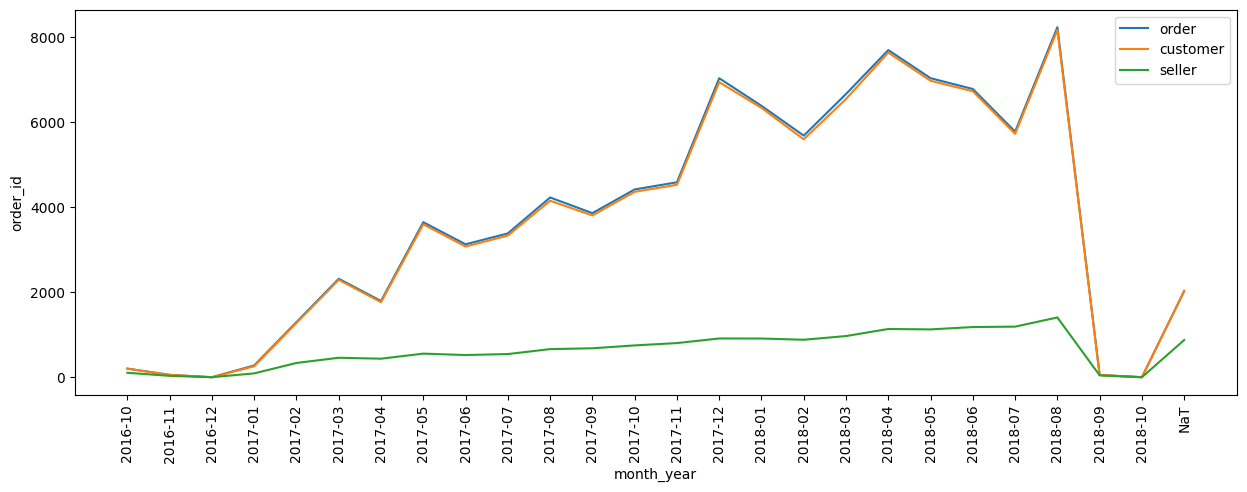

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(data=growth.groupby('month_year')['order_id'].nunique().reset_index(), x='month_year' , y='order_id', label='order')
plt.xticks(rotation=90)

sns.lineplot(data=growth.groupby('month_year')['customer_unique_id'].nunique().reset_index(), x='month_year' , y='customer_unique_id', label='customer')
plt.xticks(rotation=90)

sns.lineplot(data=growth.groupby('month_year')['seller_id'].nunique().reset_index(), x='month_year' , y='seller_id', label='seller')
plt.xticks(rotation=90)


([0, 1, 2, 3],
 [Text(0, 0, '2016.0'),
  Text(1, 0, '2017.0'),
  Text(2, 0, '2018.0'),
  Text(3, 0, 'nan')])

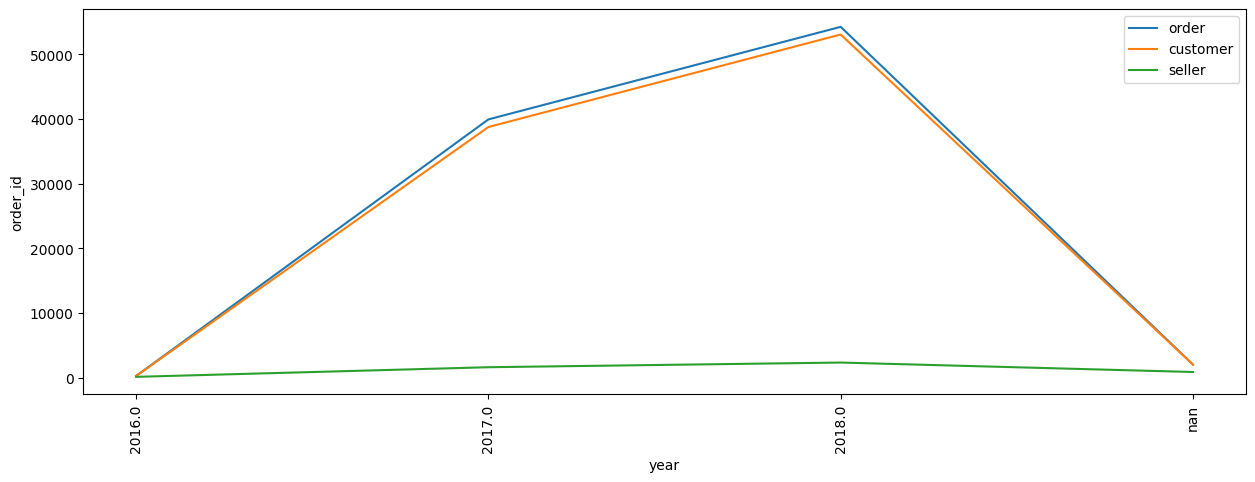

In [ ]:
plt.figure(figsize=(15,5))

sns.lineplot(data=growth.groupby('year')['order_id'].nunique().reset_index(), x='year' , y='order_id', label='order')
plt.xticks(rotation=90)

sns.lineplot(data=growth.groupby('year')['customer_unique_id'].nunique().reset_index(), x='year' , y='customer_unique_id', label='customer')
plt.xticks(rotation=90)

sns.lineplot(data=growth.groupby('year')['seller_id'].nunique().reset_index(), x='year' , y='seller_id', label='seller')
plt.xticks(rotation=90)


In [ ]:
growth.groupby('year')['seller_id'].nunique().reset_index()

,year,seller_id
0,2016.0,128
1,2017.0,1617
2,2018.0,2339
3,nan,877


In [ ]:
growth.groupby('year')['payment_value'].sum().reset_index()

,year,payment_value
0,2016.0,61612.81
1,2017.0,8209780.14
2,2018.0,11151934.06
3,nan,506205.49


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2016-10'),
  Text(1, 0, '2016-11'),
  Text(2, 0, '2016-12'),
  Text(3, 0, '2017-01'),
  Text(4, 0, '2017-02'),
  Text(5, 0, '2017-03'),
  Text(6, 0, '2017-04'),
  Text(7, 0, '2017-05'),
  Text(8, 0, '2017-06'),
  Text(9, 0, '2017-07'),
  Text(10, 0, '2017-08'),
  Text(11, 0, '2017-09'),
  Text(12, 0, '2017-10'),
  Text(13, 0, '2017-11'),
  Text(14, 0, '2017-12'),
  Text(15, 0, '2018-01'),
  Text(16, 0, '2018-02'),
  Text(17, 0, '2018-03'),
  Text(18, 0, '2018-04'),
  Text(19, 0, '2018-05'),
  Text(20, 0, '2018-06'),
  Text(21, 0, '2018-07'),
  Text(22, 0, '2018-08'),
  Text(23, 0, '2018-09'),
  Text(24, 0, '2018-10'),
  Text(25, 0, 'NaT')])

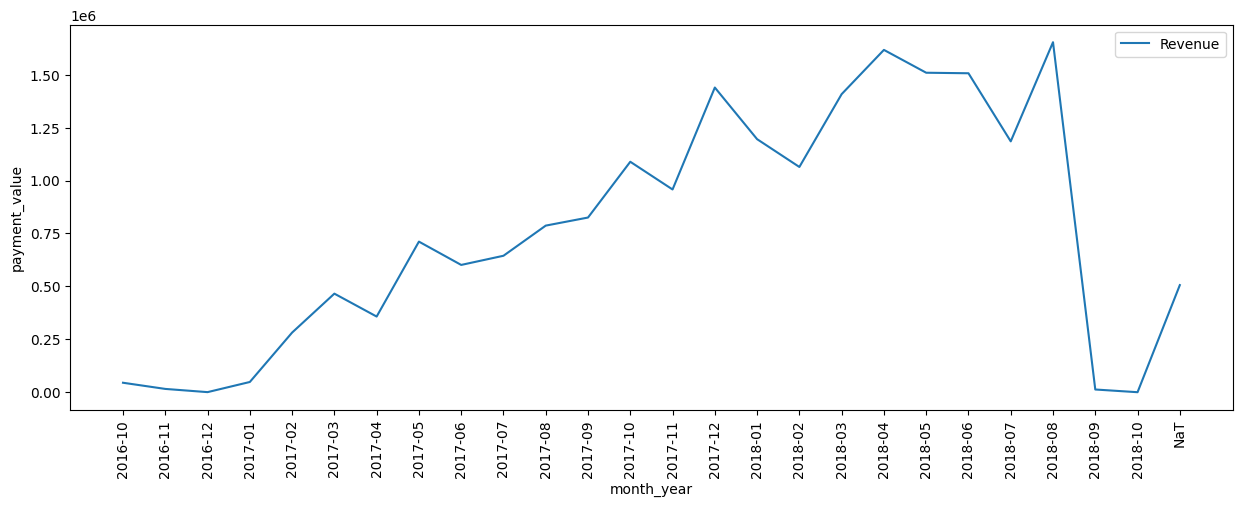

In [ ]:
# Revenue over months
plt.figure(figsize=(15,5))
sns.lineplot(data=growth.groupby('month_year')['payment_value'].sum().reset_index(), x='month_year' , y='payment_value', label='Revenue')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, '2016.0'),
  Text(1, 0, '2017.0'),
  Text(2, 0, '2018.0'),
  Text(3, 0, 'nan')])

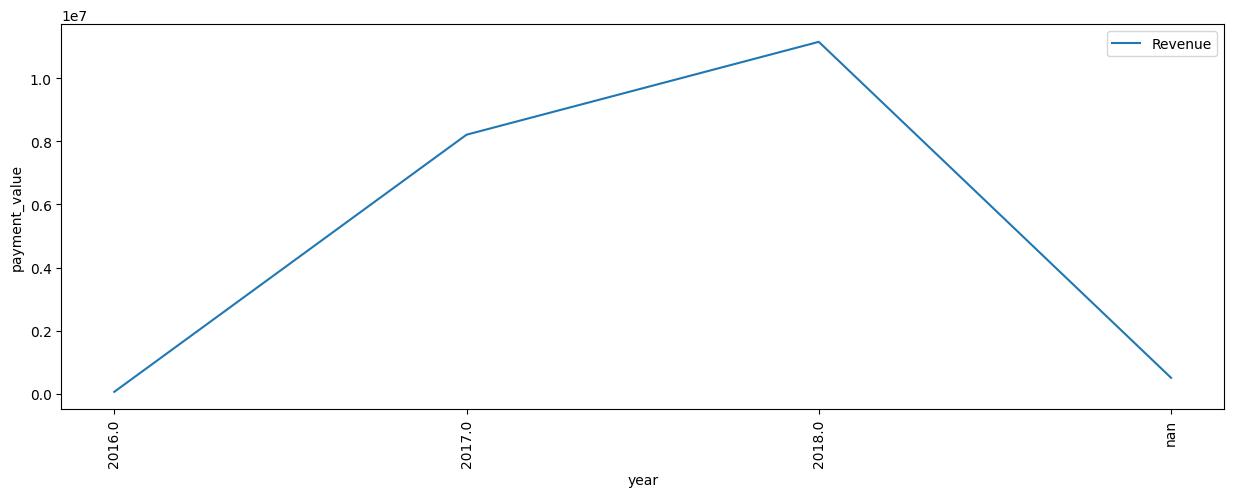

In [ ]:
# Revenue over years

plt.figure(figsize=(15,5))
sns.lineplot(data=growth.groupby('year')['payment_value'].sum().reset_index(), x='year' , y='payment_value', label='Revenue')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, '2016.0'),
  Text(1, 0, '2017.0'),
  Text(2, 0, '2018.0'),
  Text(3, 0, 'nan')])

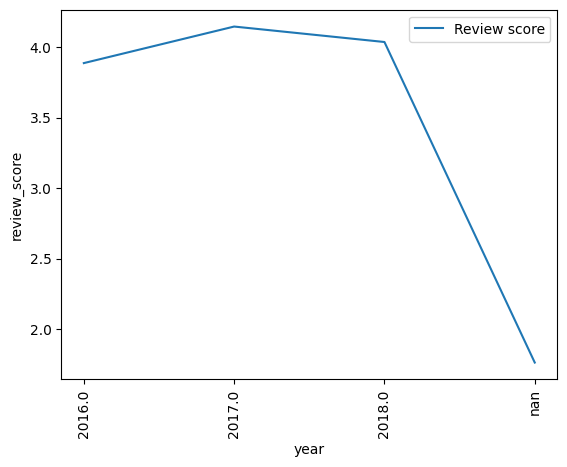

In [ ]:
#Review score over year
sns.lineplot(data=growth.groupby('year')['review_score'].mean().reset_index(), x='year' , y='review_score', label='Review score')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2016-10'),
  Text(1, 0, '2016-11'),
  Text(2, 0, '2016-12'),
  Text(3, 0, '2017-01'),
  Text(4, 0, '2017-02'),
  Text(5, 0, '2017-03'),
  Text(6, 0, '2017-04'),
  Text(7, 0, '2017-05'),
  Text(8, 0, '2017-06'),
  Text(9, 0, '2017-07'),
  Text(10, 0, '2017-08'),
  Text(11, 0, '2017-09'),
  Text(12, 0, '2017-10'),
  Text(13, 0, '2017-11'),
  Text(14, 0, '2017-12'),
  Text(15, 0, '2018-01'),
  Text(16, 0, '2018-02'),
  Text(17, 0, '2018-03'),
  Text(18, 0, '2018-04'),
  Text(19, 0, '2018-05'),
  Text(20, 0, '2018-06'),
  Text(21, 0, '2018-07'),
  Text(22, 0, '2018-08'),
  Text(23, 0, '2018-09'),
  Text(24, 0, '2018-10'),
  Text(25, 0, 'NaT')])

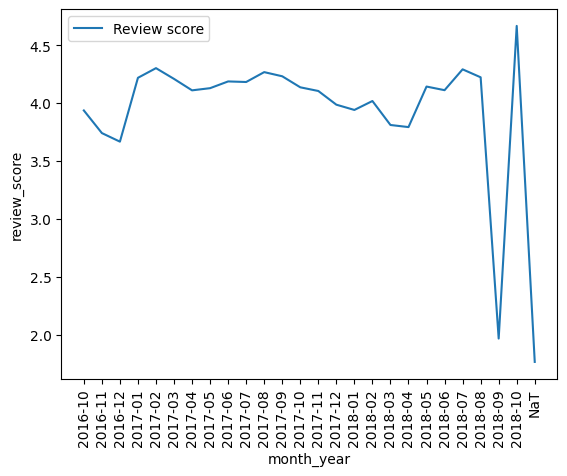

In [ ]:
#Review score over months

sns.lineplot(data=growth.groupby('month_year')['review_score'].mean().reset_index(), x='month_year' , y='review_score', label='Review score')
plt.xticks(rotation=90)

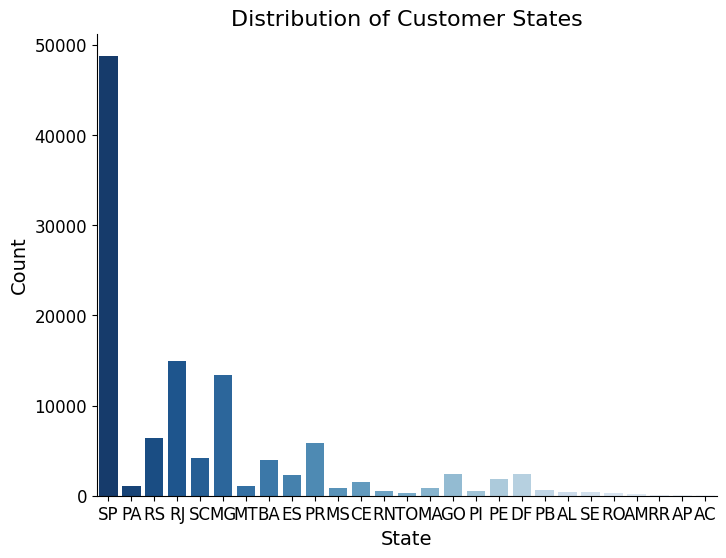

In [ ]:
# Distribution of customer states
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_state', data=merged_df, palette='Blues_r')
plt.title('Distribution of Customer States', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

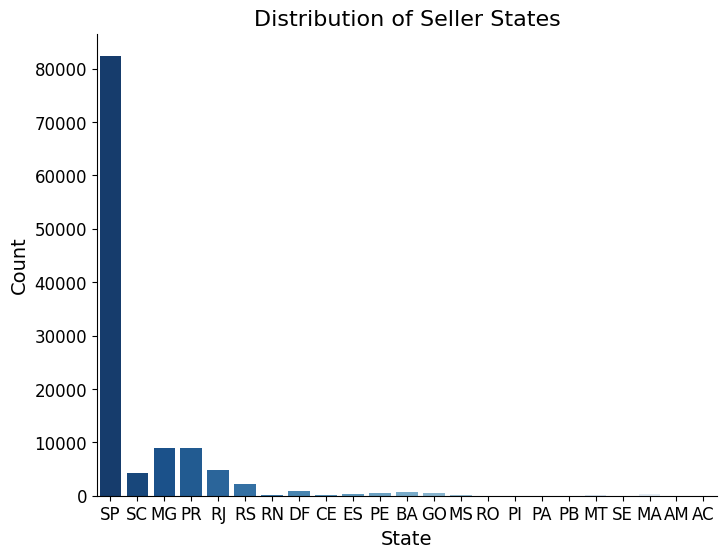

In [ ]:
# Distribution of seller states
plt.figure(figsize=(8, 6))
sns.countplot(x='seller_state', data=merged_df, palette='Blues_r')
plt.title('Distribution of Seller States', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine()
plt.show()

=> In overall, Olist growth is quite good regarding number of customers, orders, sellers, and revenue. So we keep to check if Olist to change or improve anything problem by looking at the review

## Top 100 bad and good reviews

In [ ]:
# import libaries
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stops = stopwords.words("english")
import nltk
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("changes")

import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_text(x):
    raw = BeautifulSoup(x, "html.parser")
    raw = raw.get_text()

    # Remove non-alphabetic
    clean = re.sub("[^a-zA-Z ]", " ", raw).lower()

    # Stem and remove stopwords
    clean = [porter.stem(word) for word in clean.split() if word not in stops]
    return " ".join(clean)


In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=fb443aa76880b0764f9f488d06123a87f4085f768d61a658383e827c73bc498a
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
def translate(x):
  translation = translator.translate(x,dest='en').text
  return translation

In [ ]:
review = merged_df

review = review.drop(columns='review_comment_title')
review.isna().sum()
review.dropna(inplace=True)
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47359 entries, 1 to 115608
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    47359 non-null  object        
 1   customer_unique_id             47359 non-null  object        
 2   customer_zip_code_prefix       47359 non-null  int64         
 3   customer_city                  47359 non-null  object        
 4   customer_state                 47359 non-null  object        
 5   order_id                       47359 non-null  object        
 6   order_status                   47359 non-null  object        
 7   order_purchase_timestamp       47359 non-null  datetime64[ns]
 8   order_approved_at              47359 non-null  datetime64[ns]
 9   order_delivered_carrier_date   47359 non-null  datetime64[ns]
 10  order_delivered_customer_date  47359 non-null  datetime64[ns]
 11  order_estimate

In [ ]:
bad_review = review[review['review_score']<=3][['review_comment_message','review_score']].groupby('review_comment_message')['review_score'].mean().reset_index()
bad_review = bad_review.sort_values('review_score',ascending=True)
bad_review['review_comment_message'] = bad_review['review_comment_message'].apply(clean_text) 

In [ ]:
bad_review_translate = bad_review['review_comment_message'][0:100].apply(translate)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

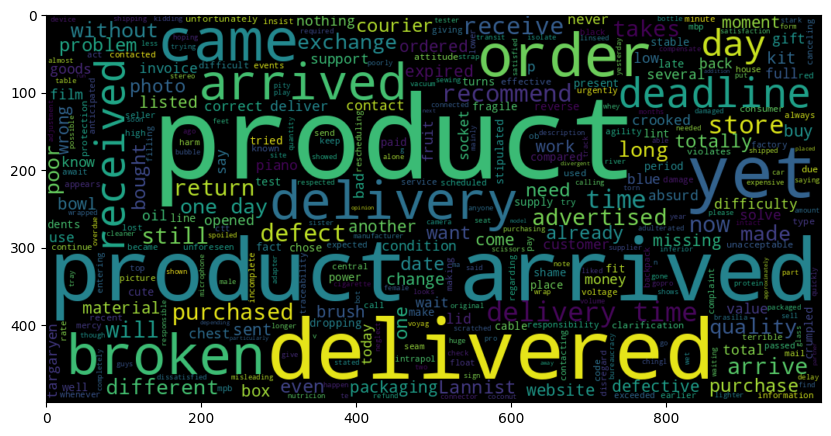

In [ ]:
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)

# The syntax requires parameter as a body of text.
text = " ".join(bad_review_translate.values)
words = WC.generate(text)

plt.imshow(words, interpolation="bilinear")
plt.show()

=> bad review mention a lots about product and delivery process

In [ ]:
#word count in bad review

result_dict_bad = {}

def word_count(sentence):
  for word in sentence.split():
    if word not in result_dict_bad:
      result_dict_bad[word] = 1
    else:
      result_dict_bad[word] += 1

bad_review_translate.apply(word_count)

result_dict_bad

{'I': 65,
 "didn't": 6,
 'receive': 7,
 'the': 48,
 'product': 79,
 'want': 4,
 'to': 34,
 'reverse': 1,
 'purchase': 4,
 'and': 54,
 'that': 11,
 'paid': 1,
 'back': 2,
 'arrived': 42,
 'with': 26,
 'crumpled': 1,
 'box': 3,
 'full': 2,
 'of': 13,
 'dents,': 1,
 "it's": 4,
 'not': 63,
 'even': 4,
 'stable,': 1,
 'a': 40,
 'shame': 1,
 'well': 1,
 'before': 3,
 'deadline': 10,
 'but': 15,
 'defect': 7,
 'it': 48,
 'came': 14,
 'broken': 12,
 'place': 1,
 'make': 1,
 'fit': 1,
 'very': 6,
 'cute': 1,
 'fragile': 1,
 'tried': 1,
 'exchange': 5,
 'through': 1,
 'website': 3,
 'could': 3,
 'late': 1,
 'now': 6,
 'contact': 2,
 'you': 3,
 'for': 13,
 'poor': 5,
 'quality': 5,
 'material': 3,
 'lint': 1,
 'line': 1,
 'dropping': 1,
 'defective': 3,
 'stipulated': 1,
 'period': 1,
 'did': 7,
 'come': 2,
 'as': 14,
 'advertised': 6,
 'work': 3,
 'low': 2,
 'compared': 1,
 'present': 1,
 'date': 4,
 'yet': 22,
 'delivered': 26,
 'The': 2,
 'had': 5,
 'problem': 4,
 'power': 1,
 'supply': 1,
 'c

In [ ]:
bad_review = pd.DataFrame({'word':result_dict_bad.keys(),'count':result_dict_bad.values()})
bad_review.sort_values('count',ascending=False).head(30)

,word,count
4,product,79
0,I,65
21,not,63
9,and,54
31,it,48
3,the,48
13,arrived,42
24,a,40
6,to,34
156,was,34


product, delivered, delivery, arrived in the top word found in top 100 bad reviews

=> number of product mention a lot in bad review

In [ ]:
#moving on check the word count of good reivew
good_review = review[review['review_score']>=4][['review_comment_message','review_score']].groupby('review_comment_message')['review_score'].mean().reset_index()
good_review = good_review.sort_values('review_score',ascending=True)
good_review['review_comment_message'] = good_review['review_comment_message'].apply(clean_text)
good_review = good_review['review_comment_message'][0:200].apply(translate)

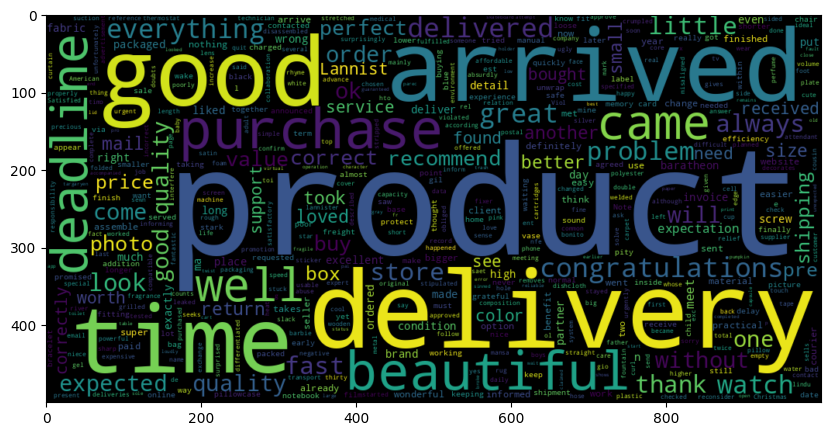

In [ ]:
plt.figure(figsize=(10, 10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)

# The syntax requires parameter as a body of text.
text = " ".join(good_review.values)
words = WC.generate(text)

plt.imshow(words, interpolation="bilinear")
plt.show()

In [ ]:
#word count in bad review

result_dict_good = {}

def word_count(sentence):
  for word in sentence.split():
    if word not in result_dict_good:
      result_dict_good[word] = 1
    else:
      result_dict_good[word] += 1

good_review.apply(word_count)

11048    None
3395     None
11077    None
11083    None
11107    None
         ... 
3207     None
11918    None
3184     None
11919    None
11920    None
Name: review_comment_message, Length: 200, dtype: object

In [ ]:
#put wordcount into dataframe
good_review = pd.DataFrame({'word':result_dict_good.keys(),'count':result_dict_good.values()})
good_review.sort_values('count',ascending=False).head(30)

,word,count
8,the,139
27,it,88
25,I,88
13,and,79
9,product,78
43,to,63
28,a,59
85,was,40
99,that,35
49,for,35


=> Good review mention a lots about delivery process
=> Both bad and good review mention about delivery process, so Olist have problem with their delivery process so we check on shipping performance

## Shipping performance

In [ ]:
# average delivery date
duration = merged_df[['order_purchase_timestamp', 'order_delivered_customer_date']]
duration['order_purchase_timestamp'] = pd.to_datetime(duration['order_purchase_timestamp'])
duration['order_delivered_customer_date'] = pd.to_datetime(duration['order_delivered_customer_date'])
test = duration.order_purchase_timestamp - duration.order_delivered_customer_date
test = test.apply(lambda x: -1* (x.days))
print('This is the average duration it takes to receive an order ' + str(test.mean()))

This is the average duration it takes to receive an order 12.976856963668967


In [ ]:
# Late delivery & ontime percentage over total order

late_ontime = merged_df[['order_id','order_estimated_delivery_date','order_delivered_customer_date']]
late_ontime['duration'] = late_ontime['order_estimated_delivery_date'] - late_ontime['order_delivered_customer_date']
late_ontime['duration'] = late_ontime['duration'].apply(lambda x: +1* (x.days))
late_ontime.drop_duplicates(inplace=True)
late_ontime.dropna(inplace=True)
print('This is ontime percentage', late_ontime[late_ontime['duration']>=0]['order_id'].count()/late_ontime['order_id'].count())
print('This is late percentage', late_ontime[late_ontime['duration']<0]['order_id'].count()/late_ontime['order_id'].count())
print('this is late ratio over ontime', late_ontime[late_ontime['duration']<0]['order_id'].count()/late_ontime[late_ontime['duration']>=0]['order_id'].count())

This is ontime percentage 0.9201574836483711
This is late percentage 0.07984251635162881
this is late ratio over ontime 0.08677049067194222


([<matplotlib.patches.Wedge at 0x7faf6d164460>,
 [Text(-1.065441491584454, 0.2735588200191949, 'Ontime'),
  Text(1.0654415043906653, -0.27355877014227886, 'late')])

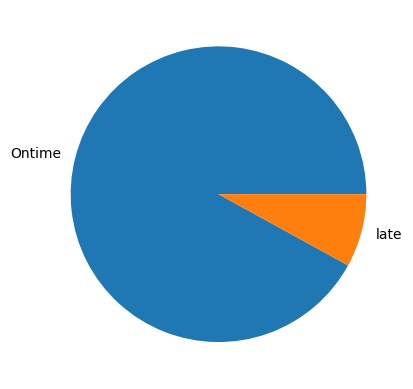

In [ ]:
x=[0.92,0.08]
plt.pie(x, labels=['Ontime','late'])

Late percentage is 8%

In [ ]:
print('this is ontime ratio over late', late_ontime[late_ontime['duration']>=0]['order_id'].count()/late_ontime[late_ontime['duration']<0]['order_id'].count())

this is ontime ratio over late 11.524655355249205


Average delivery date is 12 day, and late ratio over on time is 11.5 => late delivery account for a small percent - 8%, so we need to check if late delivery is the main factors impact to customer and do Olist need to improve it

In [ ]:
#Calculate the lead time of each process

shipping = merged_df
shipping['Total delivery day'] = shipping['order_delivered_customer_date'] - shipping['order_purchase_timestamp']
shipping['Total delivery day']  = shipping['Total delivery day'].apply(lambda x: +1* (x.days))
shipping['month_year'] = shipping['order_delivered_customer_date'].dt.to_period('M') 

# duration_estimated_delivered (late_ontime)
shipping['duration_estimated_delivered'] = shipping['order_estimated_delivery_date'] - shipping['order_delivered_customer_date']
shipping['duration_estimated_delivered']  = shipping['duration_estimated_delivered'].apply(lambda x: 1*(x.days))

# duration_carrier_customer (from carrier receiving to customer)
shipping['duration_carrier_customer'] = shipping['order_delivered_customer_date'] - shipping['order_delivered_carrier_date']
shipping['duration_carrier_customer']  = shipping['duration_carrier_customer'].apply(lambda x: 1*(x.days))

# duration_purchase_carrier (from purchase time to carrier --> seller)
shipping['duration_purchase_carrier'] = shipping['order_delivered_carrier_date'] - shipping['order_approved_at']
shipping['duration_purchase_carrier']  = shipping['duration_purchase_carrier'].apply(lambda x: 1*(x.days))

# duration_purchase_seller (from purchase to sell approve time)
# take how long for seller to approve a orders
shipping['duration_purchase_seller'] = shipping['order_approved_at'] - shipping['order_purchase_timestamp']
shipping['duration_purchase_seller']  = shipping['duration_purchase_seller'].apply(lambda x: 1*(x.days))

In [ ]:
shipping['month_year'] = shipping['month_year'].astype(str)

In [ ]:
#Calculate the late ratio

ontime_over_month = shipping[shipping['duration_estimated_delivered']>=0].groupby('month_year')['duration_estimated_delivered'].count()
late_over_month = shipping[shipping['duration_estimated_delivered'] < 0].groupby('month_year')['duration_estimated_delivered'].count()
review_over_month = shipping.groupby('month_year')['review_score'].mean().reset_index()

In [ ]:
late_ratio = late_over_month/ontime_over_month

In [ ]:
late_ratio = late_ratio.reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '2016-10'),
  Text(1, 0, '2016-11'),
  Text(2, 0, '2016-12'),
  Text(3, 0, '2017-01'),
  Text(4, 0, '2017-02'),
  Text(5, 0, '2017-03'),
  Text(6, 0, '2017-04'),
  Text(7, 0, '2017-05'),
  Text(8, 0, '2017-06'),
  Text(9, 0, '2017-07'),
  Text(10, 0, '2017-08'),
  Text(11, 0, '2017-09'),
  Text(12, 0, '2017-10'),
  Text(13, 0, '2017-11'),
  Text(14, 0, '2017-12'),
  Text(15, 0, '2018-01'),
  Text(16, 0, '2018-02'),
  Text(17, 0, '2018-03'),
  Text(18, 0, '2018-04'),
  Text(19, 0, '2018-05'),
  Text(20, 0, '2018-06'),
  Text(21, 0, '2018-07'),
  Text(22, 0, '2018-08'),
  Text(23, 0, '2018-09'),
  Text(24, 0, '2018-10')])

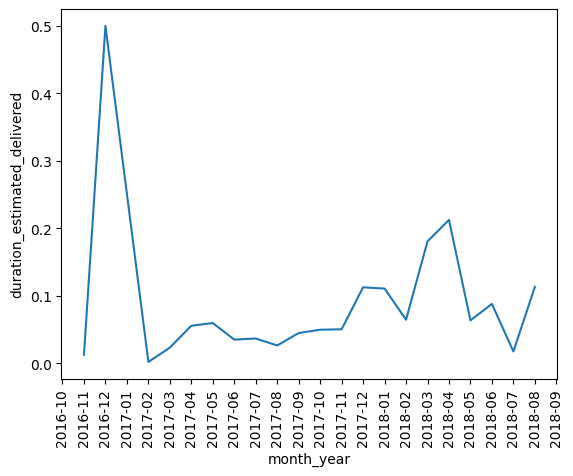

In [ ]:
sns.lineplot(data = late_ratio, x='month_year', y='duration_estimated_delivered')
plt.xticks(rotation=90)

Late Ratio is high between period 11-2017 & 12-2017,  3-2018 $ 04-2018

In [ ]:
review_over_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month_year    26 non-null     object 
 1   review_score  26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 544.0+ bytes


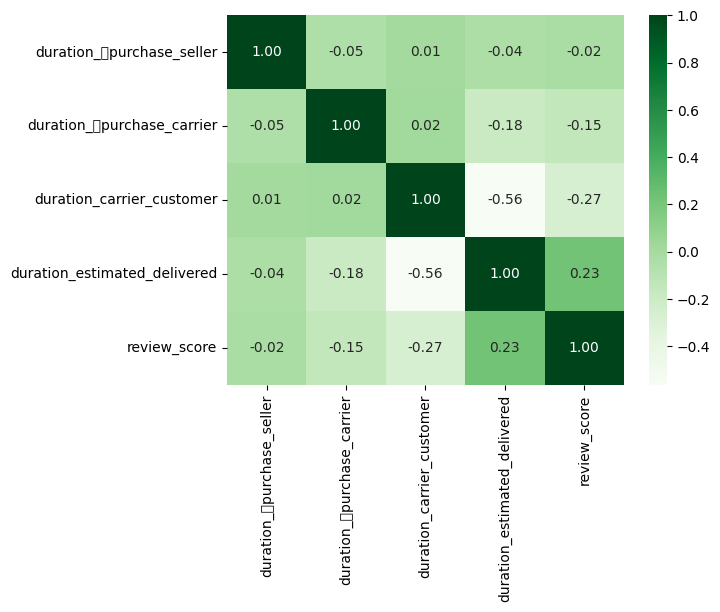

In [ ]:
# Check correlation between lead time and review scores
sns.heatmap(data=shipping[['duration_purchase_seller','duration_purchase_carrier','duration_carrier_customer','duration_estimated_delivered','review_score']].corr(), annot=True, fmt=".2f", cmap='Greens');

Lead time and review score have correlation which is a negative correlation, mean that lower review score have higher lead time

In [ ]:
late_review_score = pd.DataFrame({'Late': shipping[shipping['duration_estimated_delivered']<0]['review_score'].mean(),
              'Ontime': shipping[shipping['duration_estimated_delivered']>=0]['review_score'].mean()}, index=[0])
late_review_score

,Late,Ontime
0,2.549283,4.210424


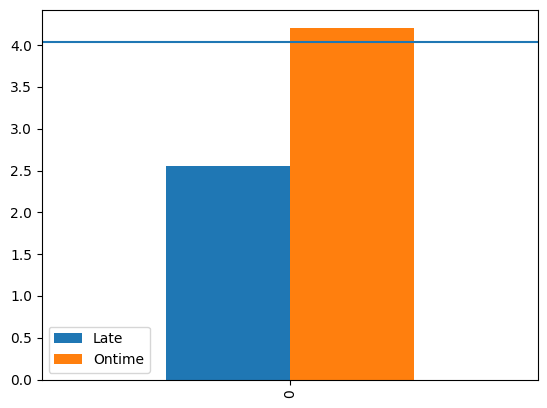

In [ ]:
late_review_score = pd.DataFrame({'Late': shipping[shipping['duration_estimated_delivered']<0]['review_score'].mean(),
              'Ontime': shipping[shipping['duration_estimated_delivered']>=0]['review_score'].mean()}, index=[0])
late_review_score.plot(kind='bar')
plt.axhline(y = shipping['review_score'].mean() )

# plt.xtext

We check the average review score to see that Late shipment have review score is lower than on time shipment, on time shipment have review scores higher than overall review score average

In [ ]:
# Put the status delivery and late for each shipment based on duration estimated delivered (compare between actual delivery date and estimated time)
def check_delivered_status(x):
  if x < 0:
    return 'Late'
  else:
    return 'Ontime'

In [ ]:
shipping['estimated_delivered_status'] = shipping['duration_estimated_delivered'].apply(check_delivered_status)

In [ ]:
shipping[shipping['duration_estimated_delivered']<0]['estimated_delivered_status']

7         Late
36        Late
46        Late
47        Late
62        Late
          ... 
115494    Late
115500    Late
115536    Late
115572    Late
115573    Late
Name: estimated_delivered_status, Length: 8715, dtype: object

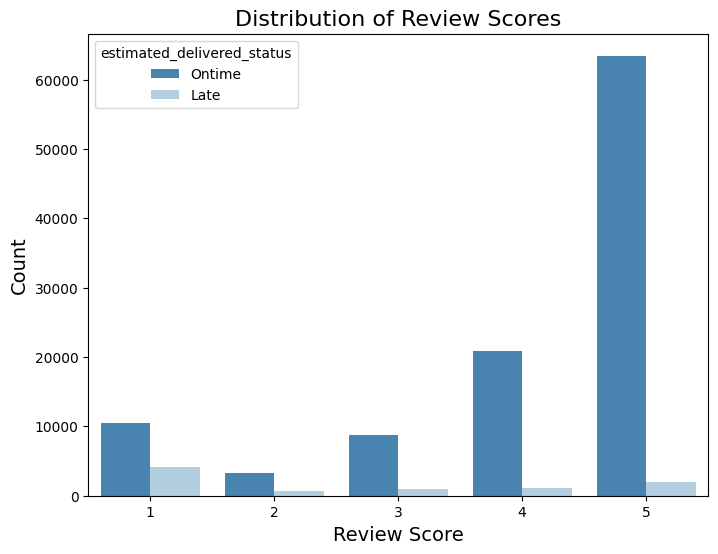

In [ ]:
# Distribution of review scores between late and on time
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=shipping, palette='Blues_r', hue='estimated_delivered_status')
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

([<matplotlib.patches.Wedge at 0x7faf6c7c7d60>,
 [Text(1.0968798797453188, 0.08279208543028393, 'percentage_seller_approval'),
  Text(-0.9238525475050062, 0.5970732538545922, 'percentage_carrier_customer'),
  Text(0.8762929701538755, -0.6649140023032295, 'percentage_sellerapproval_carrier')])

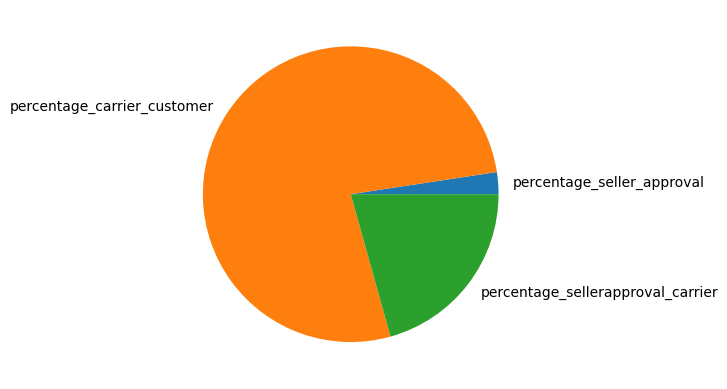

In [ ]:
# lead time components
df = pd.DataFrame([shipping['duration_purchase_seller'].mean()/shipping['Total delivery day'].mean(),
                   shipping['duration_carrier_customer'].mean()/shipping['Total delivery day'].mean(),
                   shipping['duration_purchase_carrier'].mean()/shipping['Total delivery day'].mean()])
plt.pie(df[0],labels=['percentage_seller_approval','percentage_carrier_customer' ,'percentage_sellerapproval_carrier'])

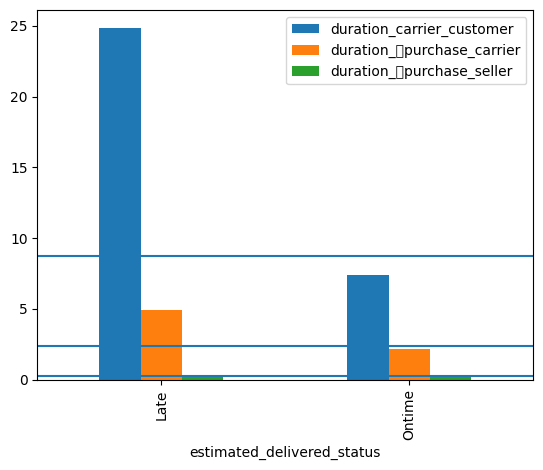

In [ ]:
#comparison of lead time of each process between late and ontime shipment

shipping.groupby('estimated_delivered_status')[['duration_carrier_customer','duration_purchase_carrier','duration_purchase_seller']].mean().plot(kind='bar')

plt.axhline(y = shipping['duration_carrier_customer'].mean() )
plt.axhline(y = shipping['duration_purchase_carrier'].mean() )
plt.axhline(y = shipping['duration_purchase_seller'].mean() )

In [ ]:
print('leadtime for seller approval: ', shipping['duration_purchase_seller'].mean())
print('leadtime for carrier pick-up: ', shipping['duration_purchase_carrier'].mean())
print('leadtime for carrier deliver to customer: ',shipping['duration_carrier_customer'].mean())

leadtime for seller approval:  0.27161209394870023
leadtime for carrier pick-up:  2.3401923076923077
leadtime for carrier deliver to customer:  8.714596141615434


In [ ]:
shipping.groupby('estimated_delivered_status')[['duration_carrier_customer','duration_purchase_carrier','duration_purchase_seller']].mean()

,duration_carrier_customer,duration_purchase_carrier,duration_purchase_seller
estimated_delivered_status,,,
Late,24.872504,4.890177,0.344464
Ontime,7.367150,2.129942,0.265672


In [ ]:
# percentage of average lead time for late shipment
df_late = pd.DataFrame([shipping[shipping['estimated_delivered_status']=='Late']['duration_purchase_seller'].mean()/shipping[shipping['duration_estimated_delivered']<0]['Total delivery day'].mean(),
                   shipping[shipping['estimated_delivered_status']=='Late']['duration_carrier_customer'].mean()/shipping[shipping['duration_estimated_delivered']<0]['Total delivery day'].mean(),
                   shipping[shipping['estimated_delivered_status']=='Late']['duration_purchase_carrier'].mean()/shipping[shipping['duration_estimated_delivered']<0]['Total delivery day'].mean()])


([<matplotlib.patches.Wedge at 0x7faf6c90e370>,
 [Text(1.0992895015287139, 0.03952963228708379, 'percentage_seller_approval'),
  Text(-0.9785578779948618, 0.5024186296448344, 'percentage_carrier_customer'),
  Text(0.9598708830158352, -0.5372596094425869, 'percentage_sellerapproval_carrier')])

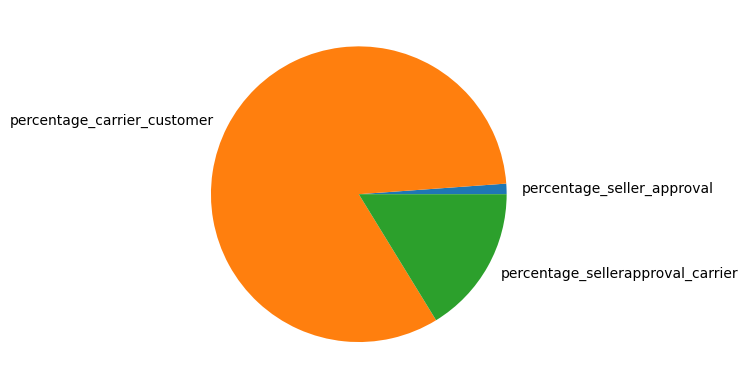

In [ ]:
plt.pie(df_late[0],labels=['percentage_seller_approval','percentage_carrier_customer' ,'percentage_sellerapproval_carrier'])

In [ ]:
df_late

,0
0,0.011175
1,0.806903
2,0.158645


In [ ]:
shipping[shipping['duration_purchase_seller']>0.27]['order_id'].count()/shipping['order_id'].count()

0.17846361442448253

In [ ]:
shipping[shipping['duration_purchase_carrier']>2.3]['order_id'].count()/shipping['order_id'].count()

0.31714658893338754

Late shipments take 30 days to complete, while on time shipment on take 10 days to complete

Late ratio is high on Black Friday, and early of the year

We continue to analyse which factors make longer lead time

# 3/ Lead time analysic


##3.1/ Lead time & product, orders

### Product size & category

<Axes: xlabel='product_category_name_english'>

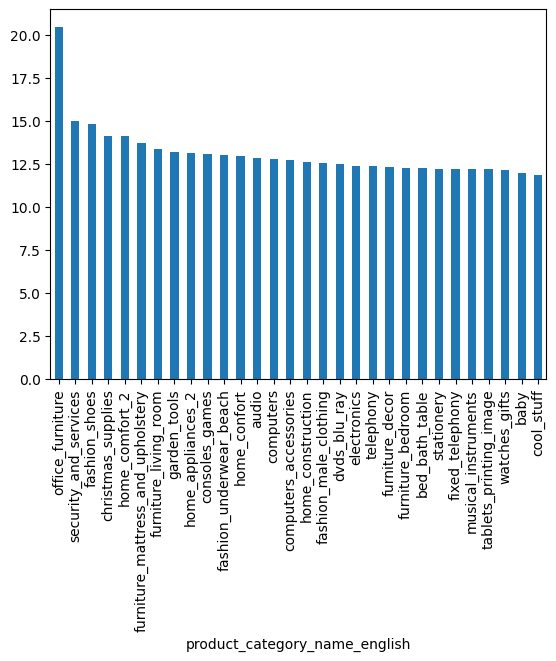

In [ ]:
# top 30 category have longest lead time among 72 categories
shipping.groupby('product_category_name_english')['Total delivery day'].mean().sort_values(ascending=False).head(30).plot(kind='bar')

Office furniture have the longest lead time

In [ ]:
shipping[['product_weight_g','product_length_cm','product_height_cm','product_width_cm','payment_sequential','duration_purchase_seller','payment_type']].corr()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,duration_purchase_seller
product_weight_g,1.000000,0.461541,0.581805,0.504686,0.040762,0.008899
product_length_cm,0.461541,1.000000,0.190537,0.534489,0.048042,0.006118
product_height_cm,0.581805,0.190537,1.000000,0.276351,0.023366,0.008141
product_width_cm,0.504686,0.534489,0.276351,1.000000,0.029402,0.003008
payment_sequential,0.040762,0.048042,0.023366,0.029402,1.000000,0.018241
duration_purchase_seller,0.008899,0.006118,0.008141,0.003008,0.018241,1.000000


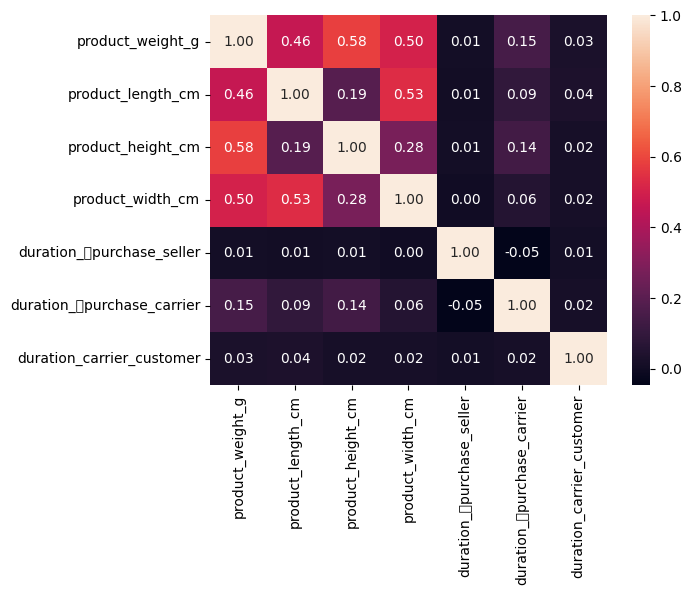

In [ ]:
sns.heatmap(data=shipping[['product_weight_g','product_length_cm','product_height_cm','product_width_cm','duration_purchase_seller', 'duration_purchase_carrier','duration_carrier_customer']].corr(), annot=True, fmt=".2f");

After checking correlation between product size and lead time we found that lead time and product have correlation. 

In [ ]:
Topdel_products = shipping.groupby("product_category_name_english").agg({"review_score":"mean", "price":"mean", "order_id":"count", "Total delivery day":"mean"})
Topdel_products = Topdel_products.sort_values(ascending=True, by="Total delivery day").reset_index()
Topdel_products

,product_category_name_english,review_score,price,order_id,Total delivery day
0,arts_and_craftmanship,4.125000,75.583750,24,5.291667
1,la_cuisine,4.133333,144.465333,15,6.800000
2,books_imported,4.419355,78.255645,62,7.847458
3,fashion_childrens_clothes,4.500000,71.231250,8,8.142857
4,party_supplies,3.847826,103.373478,46,8.644444
...,...,...,...,...,...
66,home_comfort_2,3.642857,26.231071,28,14.107143
67,christmas_supplies,4.020270,54.838649,148,14.124138
68,fashion_shoes,4.223443,89.431026,273,14.835821
69,security_and_services,2.500000,141.645000,2,15.000000


### Leadtime vs ORDERs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2016-10'),
  Text(1, 0, '2016-11'),
  Text(2, 0, '2016-12'),
  Text(3, 0, '2017-01'),
  Text(4, 0, '2017-02'),
  Text(5, 0, '2017-03'),
  Text(6, 0, '2017-04'),
  Text(7, 0, '2017-05'),
  Text(8, 0, '2017-06'),
  Text(9, 0, '2017-07'),
  Text(10, 0, '2017-08'),
  Text(11, 0, '2017-09'),
  Text(12, 0, '2017-10'),
  Text(13, 0, '2017-11'),
  Text(14, 0, '2017-12'),
  Text(15, 0, '2018-01'),
  Text(16, 0, '2018-02'),
  Text(17, 0, '2018-03'),
  Text(18, 0, '2018-04'),
  Text(19, 0, '2018-05'),
  Text(20, 0, '2018-06'),
  Text(21, 0, '2018-07'),
  Text(22, 0, '2018-08'),
  Text(23, 0, '2018-09'),
  Text(24, 0, '2018-10'),
  Text(25, 0, 'NaT')])

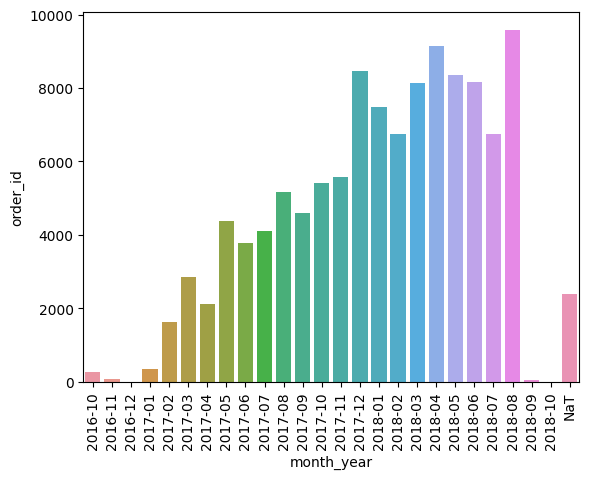

In [ ]:
#Check number order of each month
sns.barplot(data=shipping.groupby('month_year')['order_id'].count().reset_index(), x = 'month_year', y = 'order_id')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2016-10'),
  Text(1, 0, '2016-11'),
  Text(2, 0, '2016-12'),
  Text(3, 0, '2017-01'),
  Text(4, 0, '2017-02'),
  Text(5, 0, '2017-03'),
  Text(6, 0, '2017-04'),
  Text(7, 0, '2017-05'),
  Text(8, 0, '2017-06'),
  Text(9, 0, '2017-07'),
  Text(10, 0, '2017-08'),
  Text(11, 0, '2017-09'),
  Text(12, 0, '2017-10'),
  Text(13, 0, '2017-11'),
  Text(14, 0, '2017-12'),
  Text(15, 0, '2018-01'),
  Text(16, 0, '2018-02'),
  Text(17, 0, '2018-03'),
  Text(18, 0, '2018-04'),
  Text(19, 0, '2018-05'),
  Text(20, 0, '2018-06'),
  Text(21, 0, '2018-07'),
  Text(22, 0, '2018-08'),
  Text(23, 0, '2018-09'),
  Text(24, 0, '2018-10'),
  Text(25, 0, 'NaT')])

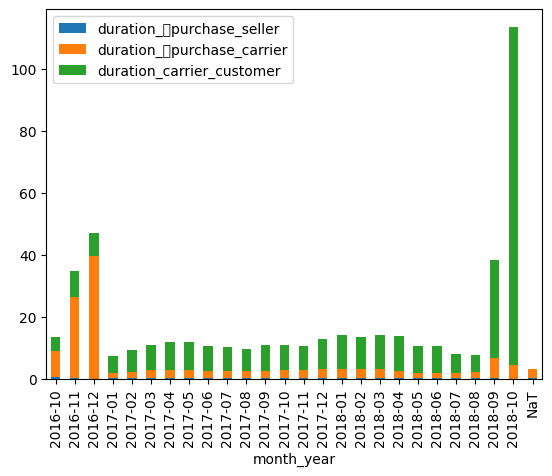

In [ ]:
#Check average lead time of each month
shipping.groupby('month_year')[['duration_purchase_seller', 'duration_purchase_carrier','duration_carrier_customer']].mean().plot(kind='bar', stacked=True)
plt.xticks(rotation=90)

We can see that order increase on Mar to May, Nov to Dec, Mar to Apr 2018, which make average lead time also increase

Now we check lead time and order to see if there is any relationship between 2 variables

In [ ]:
order_time = merged_df[['order_id','order_purchase_timestamp','Total delivery day']]
order_time['order_purchase_dayofweek'] = order_time['order_purchase_timestamp'].dt.strftime('%w')
order_time['order_purchase_dayofweek_name'] = order_time['order_purchase_timestamp'].dt.strftime('%a')
order_time['order_purchase_hour'] = order_time['order_purchase_timestamp'].dt.strftime('%H')
order_time['order_purchase_time_day'] = order_time['order_purchase_timestamp'].dt.strftime('%p')
order_time['order_purchase_day'] = order_time['order_purchase_timestamp'].dt.strftime('%-d')
order_time

,order_id,order_purchase_timestamp,Total delivery day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,order_purchase_day
0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,8.0,2,Tue,15,PM,16
1,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,18.0,4,Thu,00,AM,9
2,c1d2b34febe9cd269e378117d6681172,2017-11-09 00:50:13,18.0,4,Thu,00,AM,9
3,b1a5d5365d330d10485e0203d54ab9e8,2017-05-07 20:11:26,18.0,0,Sun,20,PM,7
4,2e604b3614664aa66867856dba7e61b7,2018-02-03 19:45:40,25.0,6,Sat,19,PM,3
...,...,...,...,...,...,...,...,...
115604,a5f8439f1e560659a492608e370ecde2,2017-05-27 14:03:20,6.0,6,Sat,14,PM,27
115605,937592924b66482b823ee7ecd185d0ff,2018-03-31 19:17:43,6.0,6,Sat,19,PM,31
115606,e22a3e8048469ea68906f666d446c25c,2017-08-28 09:48:01,8.0,1,Mon,09,AM,28
115607,1ce0acf125f1bcd636276dd213363196,2017-07-31 18:10:29,9.0,1,Mon,18,PM,31


In [ ]:
# Write a function to count lead time

def count_plot(x, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.countplot(x = x, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    plt.show()
    
def bar_plot(x, y, df, title, xlabel, ylabel, width, height, order = None, rotation=False, palette='winter', hue=None):
    ncount = len(df)
    plt.figure(figsize=(width,height))
    ax = sns.barplot(x = x, y=y, palette=palette, order = order, hue=hue)
    plt.title(title, fontsize=20)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    ax.yaxis.set_label_position('left')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    plt.show()

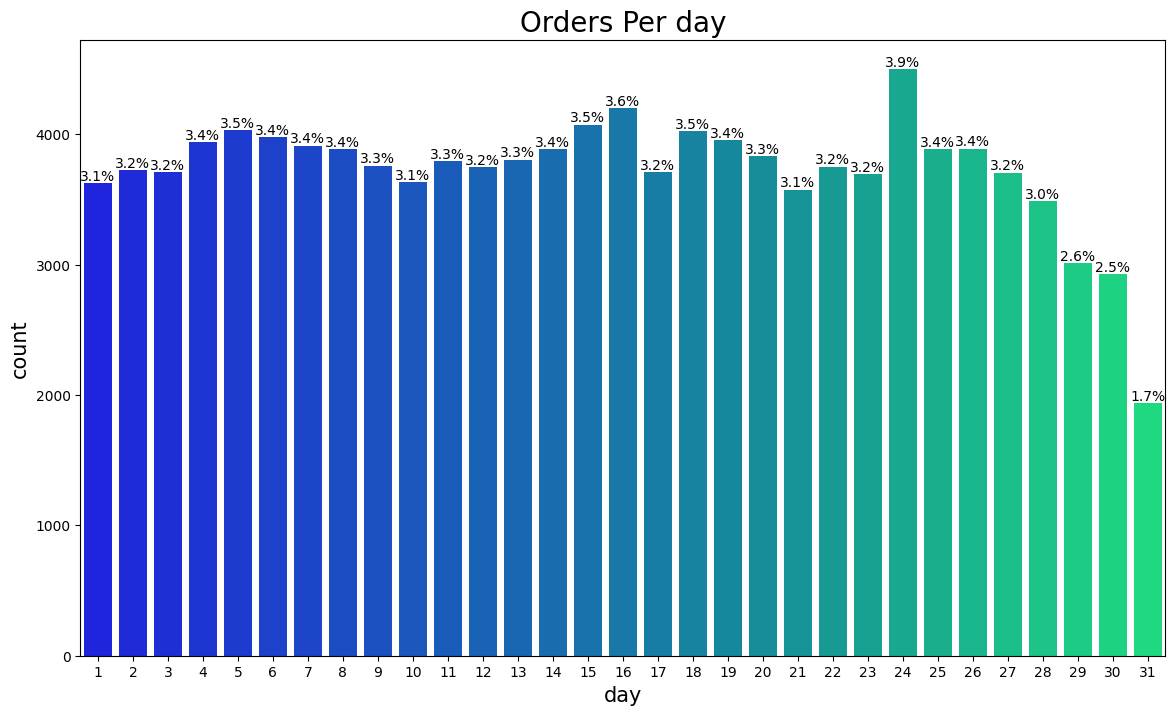

In [ ]:
x = order_time['order_purchase_day']
order = [str(i) for i in range(1,32)]
count_plot(x, order_time, 'Orders Per day', 'day', 'count', 14,8, order=order)

Orders normally increase on 24 of each month

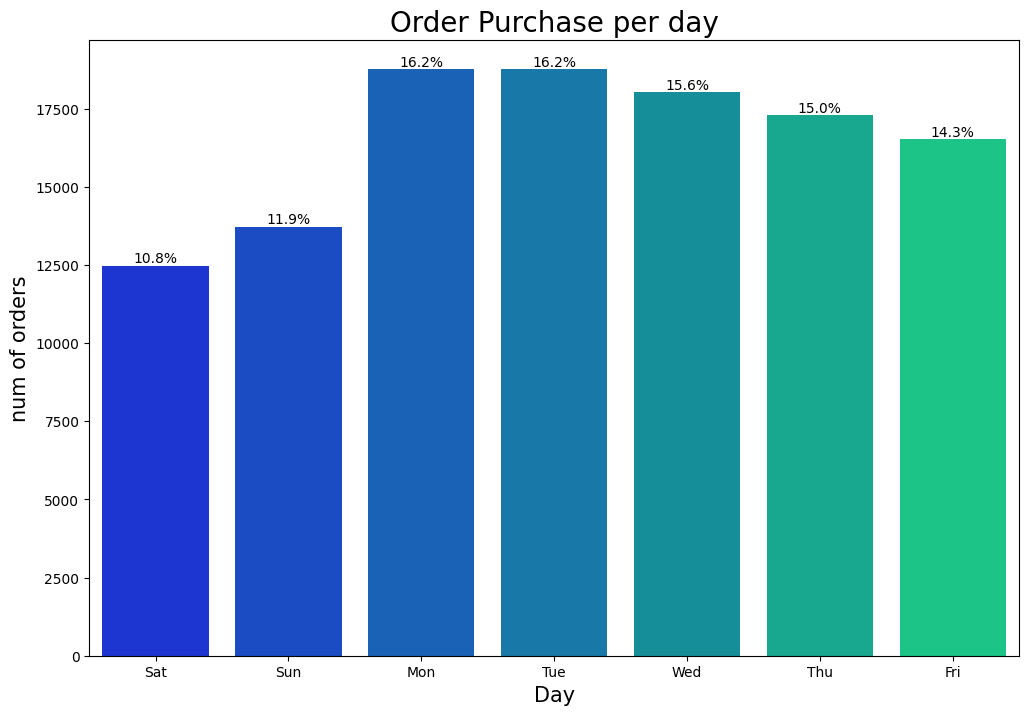

In [ ]:
order = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
x = order_time['order_purchase_dayofweek_name']
count_plot(x, order_time, 'Order Purchase per day', 'Day', 'num of orders', 12, 8, order=order)

Number of order is high on Mon and Tue

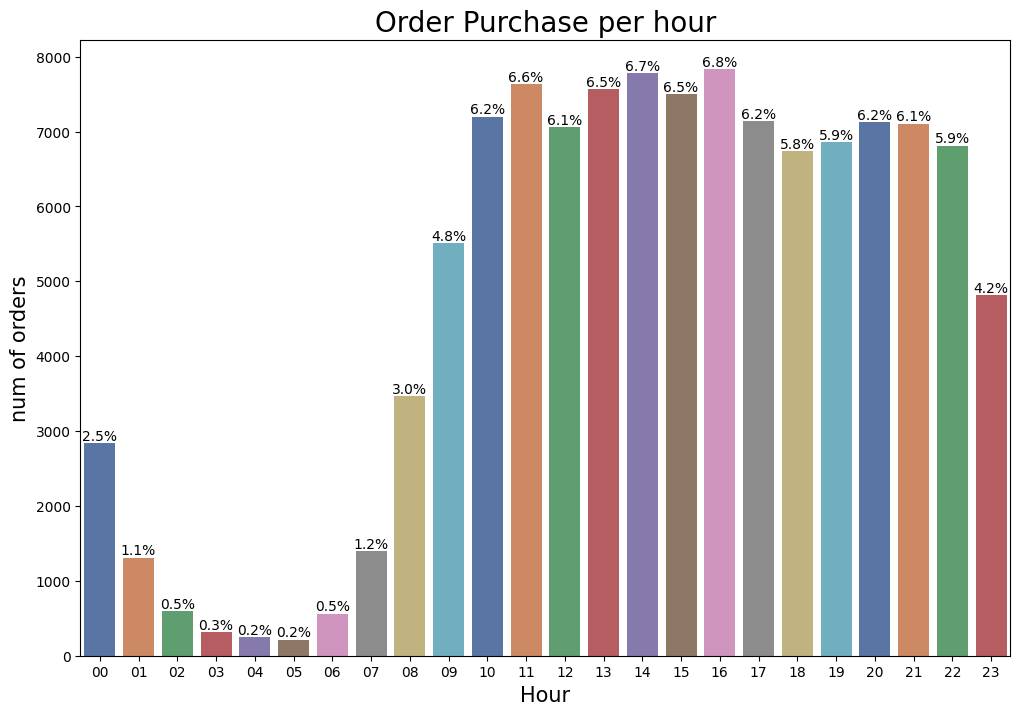

In [ ]:
x = order_time['order_purchase_hour']
order = [str(i).zfill(2) for i in range(24)]
count_plot(x, order_time, 'Order Purchase per hour', 'Hour', 'num of orders', 12, 8, order=order, palette='deep')

Customer made purchase from 10:00-22:00 each day

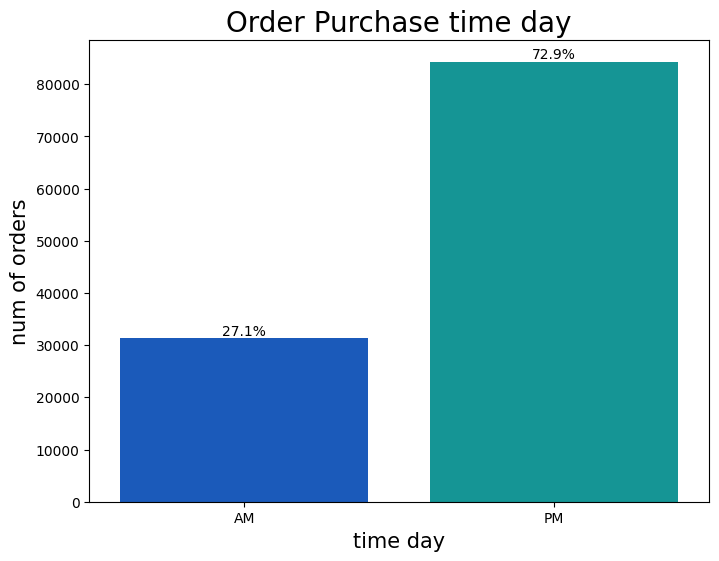

In [ ]:
x = order_time['order_purchase_time_day']
count_plot(x, order_time, 'Order Purchase time day', 'time day', 'num of orders', 8, 6, order=['AM','PM'])

They often made order on AM time

##3.2/ Lead time vs geography

In [ ]:
shipping['estimated_gap'] = shipping['Total delivery day']-shipping['duration_estimated_delivered']

In [ ]:
shipping.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,year,Total delivery day,duration_estimated_delivered,duration_carrier_customer,duration_purchase_carrier,duration_purchase_carrier,duration_purchase_seller,duration_purchase_seller,estimated_delivered_status,estimated_gap
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017.0,8.0,10.0,1.0,6 days 19:25:45,6.0,0 days 00:16:37,0.0,Ontime,-2.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017.0,18.0,20.0,5.0,12 days 00:55:49,12.0,0 days 23:57:35,0.0,Ontime,-2.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,2017.0,18.0,20.0,5.0,12 days 00:55:49,12.0,0 days 23:57:35,0.0,Ontime,-2.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,2017.0,18.0,16.0,6.0,10 days 21:53:35,10.0,1 days 02:11:30,1.0,Ontime,2.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,2018.0,25.0,21.0,9.0,14 days 19:52:28,14.0,1 days 02:43:39,1.0,Ontime,4.0


In [ ]:
estimated_gap = shipping.groupby('month_year')[['duration_purchase_seller','duration_purchase_carrier','duration_carrier_customer','duration_estimated_delivered','estimated_gap']].mean()
estimated_gap

,duration_purchase_seller,duration_purchase_carrier,duration_carrier_customer,duration_estimated_delivered,estimated_gap
month_year,,,,,
2016-10,0.505976,8.498008,4.386454,40.629482,-26.768924
2016-11,0.345679,25.913580,8.604938,19.530864,16.172840
2016-12,0.000000,39.666667,7.333333,8.666667,38.666667
2017-01,0.313609,1.647929,5.507375,29.592920,-21.495575
2017-02,0.243645,2.026038,7.130112,24.472119,-14.527261
2017-03,0.169079,2.499824,8.129701,13.414763,-2.121968
2017-04,0.252487,2.439128,9.108953,13.670772,-1.301279
2017-05,0.340128,2.467247,8.956024,11.516949,0.859139
2017-06,0.262922,2.154272,8.057753,12.623945,-1.578586


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2016-10'),
  Text(1, 0, '2016-11'),
  Text(2, 0, '2016-12'),
  Text(3, 0, '2017-01'),
  Text(4, 0, '2017-02'),
  Text(5, 0, '2017-03'),
  Text(6, 0, '2017-04'),
  Text(7, 0, '2017-05'),
  Text(8, 0, '2017-06'),
  Text(9, 0, '2017-07'),
  Text(10, 0, '2017-08'),
  Text(11, 0, '2017-09'),
  Text(12, 0, '2017-10'),
  Text(13, 0, '2017-11'),
  Text(14, 0, '2017-12'),
  Text(15, 0, '2018-01'),
  Text(16, 0, '2018-02'),
  Text(17, 0, '2018-03'),
  Text(18, 0, '2018-04'),
  Text(19, 0, '2018-05'),
  Text(20, 0, '2018-06'),
  Text(21, 0, '2018-07'),
  Text(22, 0, '2018-08'),
  Text(23, 0, '2018-09'),
  Text(24, 0, '2018-10'),
  Text(25, 0, 'NaT')])

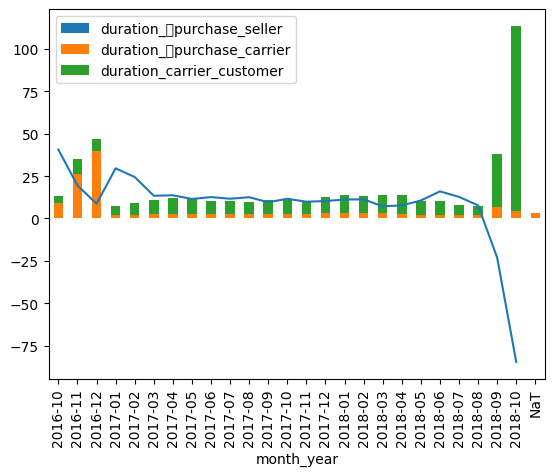

In [ ]:
estimated_gap[['duration_purchase_seller','duration_purchase_carrier','duration_carrier_customer']].plot(kind='bar', stacked=True)

estimated_gap['duration_estimated_delivered'].plot(kind='line')

plt.xticks(rotation = 90)

Estimated time was higher over period, Mar and April 2018 the estimated time drop down
=> this is the reason for late delivery percentage low over periods

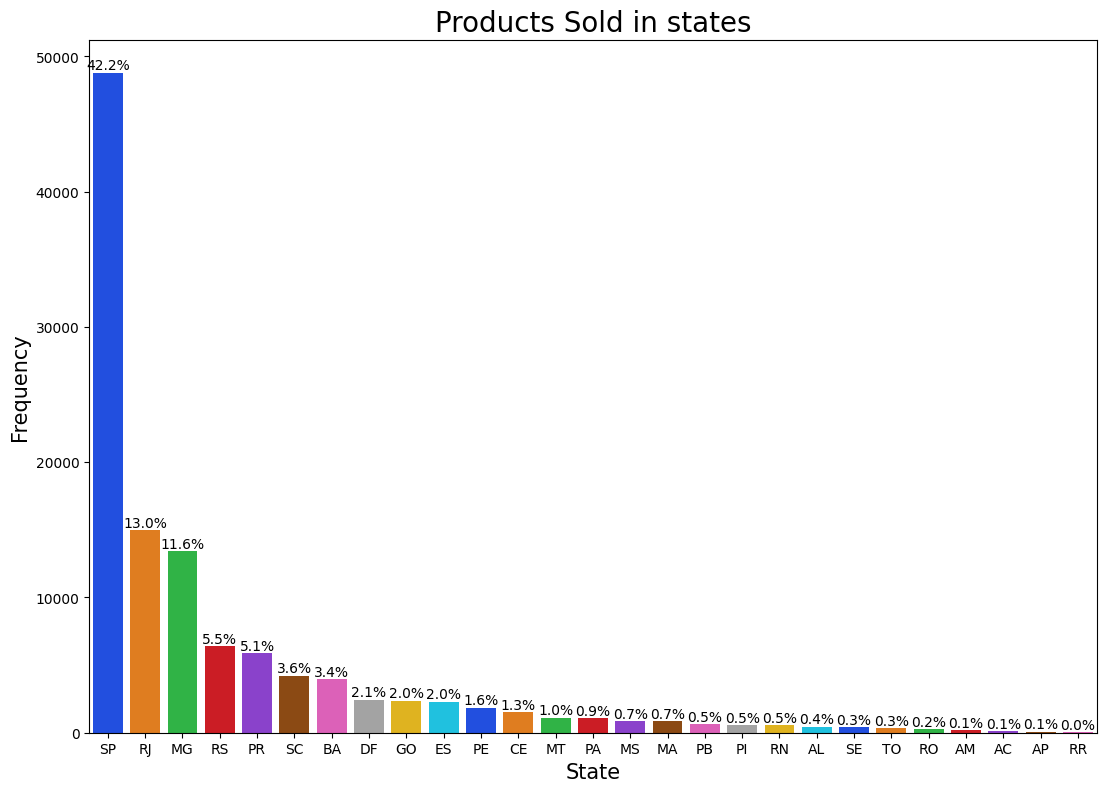

In [ ]:
count_plot(shipping['customer_state'], shipping, "Products Sold in states", "State", 'Frequency', 13, 9, order=shipping['customer_state'].value_counts().index, palette='bright')

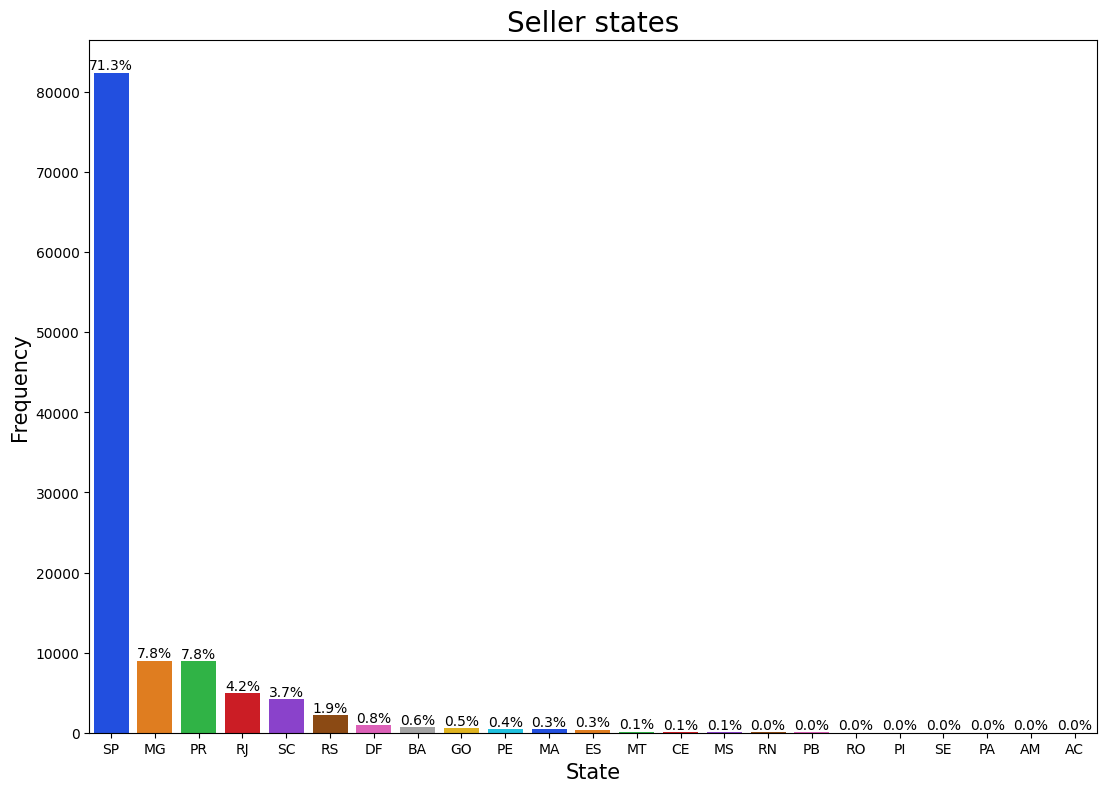

In [ ]:
count_plot(shipping['seller_state'], shipping, "Seller states", "State", 'Frequency', 13, 9, order=shipping['seller_state'].value_counts().index, palette='bright')

Seller mostly located at SP, while customer spread out to other states, so we need to check cross state delivery

In [ ]:
#Cross state delivery equal will based on customer state and seller state to count

cross_state = shipping
cross_state['cross_state'] = np.where(cross_state['customer_state'] == cross_state['seller_state'], 'Same', 'Cross')
cross_state[['customer_state','seller_state','cross_state']]

,customer_state,seller_state,cross_state
0,SP,SP,Same
1,PA,SP,Cross
2,PA,SP,Cross
3,RS,SP,Cross
4,RJ,SP,Cross
...,...,...,...
115604,RS,SC,Cross
115605,SC,SC,Same
115606,SP,SC,Cross
115607,MG,SC,Cross


In [ ]:
cross_state[cross_state['cross_state'] == 'Same']['order_id'].count()/cross_state['order_id'].count()

0.3611397036562897

In [ ]:
cross_state[cross_state['cross_state'] == 'Cross']['order_id'].count()/cross_state['order_id'].count()

0.6388602963437102

([<matplotlib.patches.Wedge at 0x7faf698a03a0>,
 [Text(0.46835717599151966, 0.995309778760989, 'Same State'),
  Text(-0.4683571759915193, -0.9953097787609891, 'Cross State')])

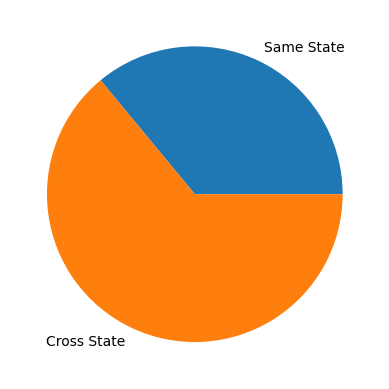

In [ ]:
x =[ 0.36, 0.64]
plt.pie(x,labels=['Same State','Cross State'])

63% cross state delivery

<Axes: xlabel='cross_state'>

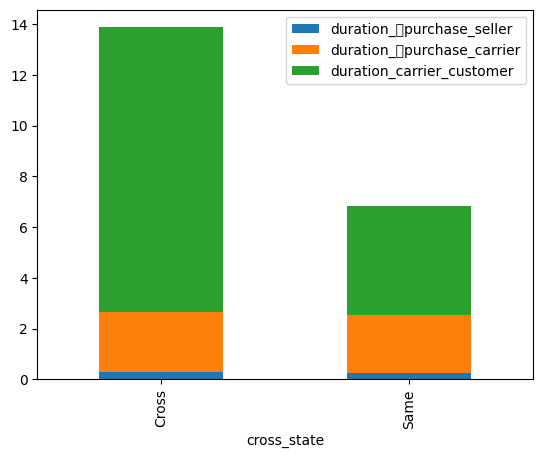

In [ ]:
cross_state.groupby('cross_state')[['duration_purchase_seller','duration_purchase_carrier','duration_carrier_customer']].mean().plot(kind='bar', stacked=True)

In [ ]:
cross_state.groupby('cross_state')[['duration_purchase_seller','duration_purchase_carrier','duration_carrier_customer']].mean()

,duration_purchase_seller,duration_purchase_carrier,duration_carrier_customer
cross_state,,,
Cross,0.284047,2.378885,11.210456
Same,0.249617,2.271430,4.299408


interstingly, we found out that cross state delivery take much lead time from carrier to customer, while lead time for approval and carrier pick-up was equal for the cross and same state delivery

In [ ]:
cross_state.groupby(['cross_state','estimated_delivered_status'])['order_id'].count()/cross_state.groupby('cross_state')['order_id'].count()

cross_state  estimated_delivered_status
Cross        Late                          0.085773
             Ontime                        0.914227
Same         Late                          0.057005
             Ontime                        0.942995
Name: order_id, dtype: float64

In [ ]:
cross_state[cross_state['estimated_delivered_status']=='Late'].groupby('cross_state')['order_id'].count()/cross_state[cross_state['estimated_delivered_status']=='Late']['order_id'].count()

cross_state
Cross    0.726908
Same     0.273092
Name: order_id, dtype: float64

([<matplotlib.patches.Wedge at 0x7faf69800c40>,
 [Text(-0.7274431012982643, 0.8251221330042985, 'Cross'),
  Text(0.7274431785517705, -0.8251220648961565, 'Same')])

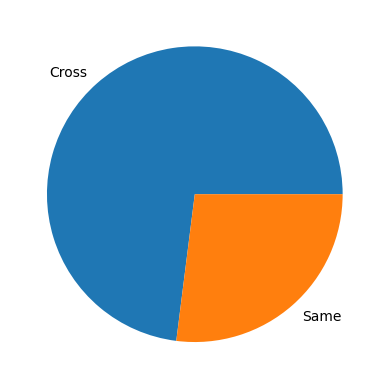

In [ ]:
plt.pie(x=[0.73,0.27],labels=['Cross','Same'])

In [ ]:
cross_state[cross_state['estimated_delivered_status'] == 'Late'].groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False).head(30)

product_category_name_english
bed_bath_table                     933
health_beauty                      870
furniture_decor                    688
sports_leisure                     633
computers_accessories              592
watches_gifts                      495
housewares                         458
telephony                          385
garden_tools                       355
auto                               346
toys                               302
electronics                        273
baby                               270
perfumery                          262
cool_stuff                         249
stationery                         205
office_furniture                   151
fashion_bags_accessories           137
pet_shop                           121
consoles_games                      86
construction_tools_construction     72
luggage_accessories                 58
musical_instruments                 56
home_appliances                     52
home_construction                 

<Axes: xlabel='month_year'>

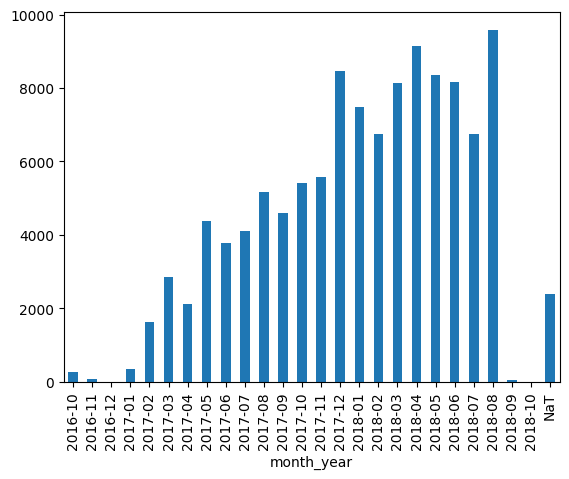

In [ ]:
cross_state.groupby('month_year')['order_id'].count().plot(kind='bar')

In [ ]:
cross_state.groupby('seller_state')['order_id'].count().sort_values(ascending=False)

seller_state
SP    82417
MG     9014
PR     8964
RJ     4906
SC     4221
RS     2224
DF      937
BA      698
GO      537
PE      461
MA      403
ES      374
MT      147
CE      103
MS       59
RN       56
PB       40
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: order_id, dtype: int64

# 4/ Warehouse determination by K-mean

## DATA PREPROCESSING

In [ ]:
#Review the shape and profile of the sellers df
sellers = df_sellers
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
#Convert zip code column to a string object
sellers["seller_zip_code_prefix"] = sellers["seller_zip_code_prefix"].astype('str')

#Remove the prefix from the xip_code column name
sellers.rename(columns = {"seller_zip_code_prefix" : "seller_zipcode"}, inplace=True)

In [ ]:
#Confirm an update to the data type of the zipcode column
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seller_id       3095 non-null   object
 1   seller_zipcode  3095 non-null   object
 2   seller_city     3095 non-null   object
 3   seller_state    3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


In [ ]:
geo_df = df_geolocation.groupby('geolocation_zip_code_prefix')[['geolocation_lat','geolocation_lng']].mean().reset_index()
#Convert geolocation_zip_code_prefix column to string
geo_df["geolocation_zip_code_prefix"] =  geo_df["geolocation_zip_code_prefix"].astype('str')

#Rename geolocation_zip_code_prefix column 
geo_df.rename(columns={"geolocation_zip_code_prefix":"geolocation_zipcode"}, inplace=True)

In [ ]:
#Merge the sellers and geo_df to get longitude and latitue vaues
sellers_geo = sellers.merge(geo_df, left_on='seller_zipcode', right_on = 'geolocation_zipcode')

#Create the coordinate column as a combination on the latitiue and longitude values
sellers_geo["seller_coor"] = list(zip(sellers_geo["geolocation_lat"], sellers_geo["geolocation_lng"]))
sellers_geo.head()

,seller_id,seller_zipcode,seller_city,seller_state,geolocation_zipcode,geolocation_lat,geolocation_lng,seller_coor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.893317,-47.060596,"(-22.893317190455804, -47.060596205366885)"
1,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,13023,-22.893317,-47.060596,"(-22.893317190455804, -47.060596205366885)"
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844,-22.383375,-46.948142,"(-22.3833748416877, -46.94814213967389)"
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,20031,-22.909446,-43.180240,"(-22.90944638719964, -43.18023952743163)"
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,20031,-22.909446,-43.180240,"(-22.90944638719964, -43.18023952743163)"


In [ ]:
sellers_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3087
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   seller_id            3088 non-null   object 
 1   seller_zipcode       3088 non-null   object 
 2   seller_city          3088 non-null   object 
 3   seller_state         3088 non-null   object 
 4   geolocation_zipcode  3088 non-null   object 
 5   geolocation_lat      3088 non-null   float64
 6   geolocation_lng      3088 non-null   float64
 7   seller_coor          3088 non-null   object 
dtypes: float64(2), object(6)
memory usage: 217.1+ KB


In [ ]:
#Drop unnecessary columns
sellers_geo.drop(columns=["geolocation_zipcode", "geolocation_lat", "geolocation_lng"], inplace=True)
sellers_geo.head()

,seller_id,seller_zipcode,seller_city,seller_state,seller_coor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,"(-22.893317190455804, -47.060596205366885)"
1,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,"(-22.893317190455804, -47.060596205366885)"
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,"(-22.3833748416877, -46.94814213967389)"
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,"(-22.90944638719964, -43.18023952743163)"
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,"(-22.90944638719964, -43.18023952743163)"


In [ ]:
#Confirm update to sellers geo df
sellers_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3088 entries, 0 to 3087
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seller_id       3088 non-null   object
 1   seller_zipcode  3088 non-null   object
 2   seller_city     3088 non-null   object
 3   seller_state    3088 non-null   object
 4   seller_coor     3088 non-null   object
dtypes: object(5)
memory usage: 144.8+ KB


In [ ]:
sellers_geo.duplicated().sum()

0

In [ ]:
customers = df_customers

#Convert customer_zip_code_prefix column to string
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype('str')

#Remove the prefix from the xip_code column name
customers.rename(columns = {"customer_zip_code_prefix" : "customer_zipcode"}, inplace=True)

In [ ]:
#Merge the customers and geo_df to get longitude and latitue vaues
cus_geo = customers.merge(geo_df, left_on='customer_zipcode', right_on = 'geolocation_zipcode')

#Create the coordinate column as a combination on the latitiue and longitude values
cus_geo["customer_coor"] = list(zip(cus_geo["geolocation_lat"], cus_geo["geolocation_lng"]))
cus_geo.head()

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,geolocation_zipcode,geolocation_lat,geolocation_lng,customer_coor
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.499273,-47.396658,"(-20.49927275425701, -47.3966577972267)"
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.499273,-47.396658,"(-20.49927275425701, -47.3966577972267)"
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.499273,-47.396658,"(-20.49927275425701, -47.3966577972267)"
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.499273,-47.396658,"(-20.49927275425701, -47.3966577972267)"
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.499273,-47.396658,"(-20.49927275425701, -47.3966577972267)"


In [ ]:
cus_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99163 entries, 0 to 99162
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          99163 non-null  object 
 1   customer_unique_id   99163 non-null  object 
 2   customer_zipcode     99163 non-null  object 
 3   customer_city        99163 non-null  object 
 4   customer_state       99163 non-null  object 
 5   geolocation_zipcode  99163 non-null  object 
 6   geolocation_lat      99163 non-null  float64
 7   geolocation_lng      99163 non-null  float64
 8   customer_coor        99163 non-null  object 
dtypes: float64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
warehouse = cus_geo

## Run K-mean

In [ ]:
warehouse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99163 entries, 0 to 99162
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          99163 non-null  object 
 1   customer_unique_id   99163 non-null  object 
 2   customer_zipcode     99163 non-null  object 
 3   customer_city        99163 non-null  object 
 4   customer_state       99163 non-null  object 
 5   geolocation_zipcode  99163 non-null  object 
 6   geolocation_lat      99163 non-null  float64
 7   geolocation_lng      99163 non-null  float64
 8   customer_coor        99163 non-null  object 
dtypes: float64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
y = warehouse[['geolocation_lat','geolocation_lng']]
y

,geolocation_lat,geolocation_lng
0,-20.499273,-47.396658
1,-20.499273,-47.396658
2,-20.499273,-47.396658
3,-20.499273,-47.396658
4,-20.499273,-47.396658
...,...,...
99158,-23.501806,-52.150926
99159,-28.527713,-54.146075
99160,-23.588483,-46.737908
99161,-16.822834,-49.250203


In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'score')

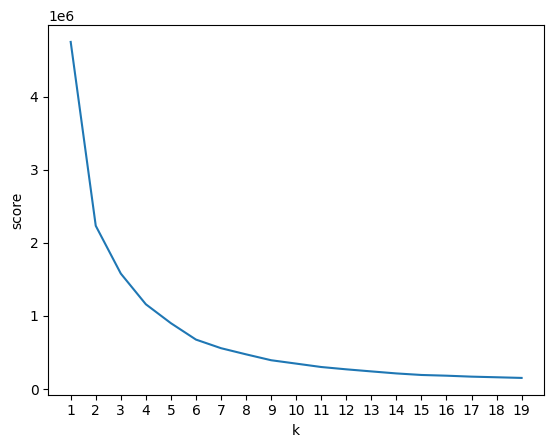

In [ ]:
c = []
k_values = range(1,20)

for i in k_values:
  kmean = KMeans(n_clusters=i, random_state=42)
  kmean.fit(y)
  c.append(kmean.inertia_)

plt.plot(k_values,c)
plt.xlabel('k')
plt.xticks(ticks=range(1,20))
plt.ylabel('score')

In [ ]:
# Call, fit the KMean model, and run prediction to find the cluster of each customer.
# YOUR CODE HERE
kmean = KMeans(n_clusters=4, random_state=42)
kmean.fit(y)
warehouse['warehouse'] = kmean.predict(y)

In [ ]:
warehouse.groupby('warehouse')[['geolocation_lat','geolocation_lng']].mean()

,geolocation_lat,geolocation_lng
warehouse,,
0,-15.483329,-50.890461
1,-26.967545,-50.963294
2,-8.145253,-39.449168
3,-22.508877,-45.549044


In [ ]:
import folium
m=folium.Map(location=[-22.509819	, -45.544629])

#Adding markers to the map
folium.Marker(location=[-22.509819, -45.544629],popup='Default popup Marker1',tooltip='Click here to see Popup').add_to(m)
folium.Marker(location=[-15.583707	, -50.953681],popup='<strong>Marker3</strong>',tooltip='<strong>Click here to see Popup</strong>').add_to(m)
folium.Marker(location=[-26.959629	, -50.958773],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m)
folium.Marker(location=[-8.172858	, -39.522155],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m)

m

In [ ]:
def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

## Distance for evaluation

In [ ]:
#Drop unnecessary columns
cus_geo.drop(columns=["geolocation_zipcode", "geolocation_lat", "geolocation_lng"], inplace=True)
cus_geo.head()

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,customer_coor,warehouse
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3


In [ ]:
cus_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99163 entries, 0 to 99162
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99163 non-null  object
 1   customer_unique_id  99163 non-null  object
 2   customer_zipcode    99163 non-null  object
 3   customer_city       99163 non-null  object
 4   customer_state      99163 non-null  object
 5   customer_coor       99163 non-null  object
 6   warehouse           99163 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 5.7+ MB


In [ ]:
distance_cus = df_orders.merge(cus_geo, on="customer_id", how='inner')

In [ ]:
distance_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99163 entries, 0 to 99162
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99163 non-null  object        
 1   customer_id                    99163 non-null  object        
 2   order_status                   99163 non-null  object        
 3   order_purchase_timestamp       99163 non-null  object        
 4   order_approved_at              99004 non-null  object        
 5   order_delivered_carrier_date   97387 non-null  object        
 6   order_delivered_customer_date  96212 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99163 non-null  object        
 8   customer_unique_id             99163 non-null  object        
 9   customer_zipcode               99163 non-null  object        
 10  customer_city                  99163 non-null  object        
 11  customer_state 

In [ ]:
distance_seller = df_item.merge(sellers_geo, on="seller_id", how='inner')

In [ ]:
distance_final = distance_cus.merge(distance_seller, on='order_id', how = 'inner')

In [ ]:
distance_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112096 entries, 0 to 112095
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112096 non-null  object        
 1   customer_id                    112096 non-null  object        
 2   order_status                   112096 non-null  object        
 3   order_purchase_timestamp       112096 non-null  object        
 4   order_approved_at              112081 non-null  object        
 5   order_delivered_carrier_date   110913 non-null  object        
 6   order_delivered_customer_date  109660 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112096 non-null  object        
 8   customer_unique_id             112096 non-null  object        
 9   customer_zipcode               112096 non-null  object        
 10  customer_city                  112096 non-null  object        
 11  

In [ ]:
distance_final.duplicated().sum()

0

In [ ]:
#Compute the distance between sellers and buyers by merging with the sellers geo and cus_geo datasets
import geopy.distance as GD

#define a function to a calculate the distance between buyers and sellers
def distancer(row):
    coords_1 = (row['seller_coor'][0], row['seller_coor'][1])
    coords_2 = (row['customer_coor'][0], row['customer_coor'][1])
    return GD.geodesic(coords_1, coords_2).miles

#apply distancer function
distance_final["distance_miles"] = distance_final.apply(distancer, axis=1)
distance_final.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zipcode,...,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zipcode,seller_city,seller_state,seller_coor,distance_miles
19768,803b11f9f2ca75d45d2274b06fbbc71f,58de8e8cfeabb2443286e9d7a08e97c0,delivered,2017-02-08 18:22:59,2017-02-08 18:35:15,2017-02-10 08:11:58,2017-02-24 10:33:03,2017-03-10 00:00:00,c1471d12a2f5e975b20ccef490fea06a,38400,...,77cc62dc80ebe12a0452d1ce0565acdc,218d46b86c1881d022bce9c68a7d4b15,2017-02-13 18:22:59,113.00,17.53,14070,ribeirao preto,SP,"(-21.113398997508757, -47.79097670370589)",154.648093
33935,cf1763a6cef94ae43c5fc1d02976d5a3,58c26d9f4361488a9a1de023ad4e744d,delivered,2017-04-14 14:33:32,2017-04-14 14:45:17,2017-04-17 14:00:14,2017-05-02 13:01:36,2017-05-26 00:00:00,5f536571164423b89ce1af9616d011bd,89015,...,b0075cdedc8e455d734e6b1875336ca1,0ea22c1cfbdc755f86b9b54b39c16043,2017-04-20 14:45:17,29.90,41.94,35700,sete lagoas,MG,"(-19.458110967354493, -44.24812806575352)",596.512697
23719,d47efef4161e33638c14122a723fd9fb,c228d2ea46e34e2257e8b34b694ad9e5,delivered,2018-04-05 08:22:39,2018-04-06 03:28:34,2018-05-04 15:42:00,2018-05-08 17:54:30,2018-05-09 00:00:00,22e35adb0223a13bf4d54950a468551e,1318,...,65ab2b4e40425acec6125e3d48919b2e,d32e3909cfb714fb2a6cb092c85b9c5f,2018-05-04 03:28:34,122.90,11.49,13215,jundiai,SP,"(-23.169423079351155, -46.88676999395853)",31.133756
30522,5d77e1d80ea67e8a68570ae87730fc2d,3ad16b9c5e94ca886631bee7a641d599,delivered,2018-01-25 16:25:41,2018-01-25 16:39:31,2018-01-26 14:36:15,2018-02-03 13:39:00,2018-02-19 00:00:00,d86c24c6858579f47494fe770074214e,4253,...,bd6e6fce9ada76ea2db0f1912e8e478f,1835b56ce799e6a4dc4eddc053f04066,2018-01-31 16:39:31,56.99,12.74,14940,ibitinga,SP,"(-21.757225105309477, -48.82954113566027)",191.594239
13398,1b3536ddfe2299bbc8c552672462aefe,23fb04c3937f6575ffb5aec1eed1a1ca,delivered,2018-03-23 16:54:20,2018-03-26 10:27:28,2018-03-26 21:41:26,2018-04-04 22:19:14,2018-04-18 00:00:00,90d7313bf1a26db76e648a5499f99908,54340,...,1a758361b1c10b3ffe3d3373332de319,8d956fec2e4337affcb520f56fd8cbfd,2018-03-30 10:27:28,46.99,19.04,9780,sao bernardo do campo,SP,"(-23.71503808590345, -46.53670731057909)",1314.555487
45660,744dddb0362cbcb141adaed27f19cb3a,08c07e9a2ca88f8c94694bd4972a4eed,delivered,2017-03-08 19:30:26,2017-03-08 19:30:26,2017-03-10 10:48:01,2017-03-18 09:21:56,2017-04-18 00:00:00,2454d481eb521ebf016dd2ef39314a73,76804,...,b35ce9c1e37f5b0f4134da0fe4c93b84,dd2bdf855a9172734fbc3744021ae9b9,2017-03-14 19:30:26,69.90,26.30,31255,belo horizonte,MG,"(-19.86963430072193, -43.950959989265286)",1536.940429
59878,3f5c39e43c1ec1232676e88090d48fe7,209ad2bfbe7e0b781a5d22d92ec099f3,delivered,2017-05-02 22:11:54,2017-05-03 15:30:19,2017-05-04 09:08:16,2017-05-13 09:39:37,2017-05-25 00:00:00,ebcfea2aa4ee12ae2069e0f49139d419,84262,...,8100d323ffa1909cfcf9fdf05f20b678,f8db351d8c4c4c22c6835c19a46f01b0,2017-05-09 15:30:19,141.90,19.27,13324,salto,SP,"(-23.209237618385853, -47.30949579326334)",223.345130
61398,2eabf18a592d25bccb2e8778a7ea08e4,460542533cc122abe1f9cc18f2dfa8fc,delivered,2017-12-20 12:16:24,2017-12-20 12:32:03,2018-01-02 16:02:49,2018-01-15 10:09:32,2018-01-19 00:00:00,61615462ba0c9794aca790381c4ba0df,52061,...,e53e557d5a159f5aa2c5e995dfdf244b,88460e8ebdecbfecb5f9601833981930,2017-12-27 12:31:29,109.90,42.80,87030,maringa,PR,"(-23.41353298113764, -51.92728239758524)",1546.224681
92701,150dc175b7b194d73dcf47f08fba98c1,3abab18d333632bb552ef5bb5ab8cc25,delivered,2018-02-20 20:27:07,2018-02-20 20:35:34,2018-02-23 23:54:35,2018-03-12 17:05:07,2018-03-15 00:00:00,68a6ca228b55913fd02800f4e184024c,27285,...,b6475dae3a2796ed87cabc7b8e8debcf,eb5b6204dde3a6e03b5f1bb8479f055b,2018-02-26 20:35:34,19.90,15.10,6900,embu guacu,SP,"(-23.835045093089292, -46.8141243529698)",196.443109
62180,6b1e495243da4b3d42a27e801e6f252f,9180c19bbfef480393c4230dd55aa72d,deliv

In [ ]:
distance_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112096 entries, 0 to 112095
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112096 non-null  object        
 1   customer_id                    112096 non-null  object        
 2   order_status                   112096 non-null  object        
 3   order_purchase_timestamp       112096 non-null  object        
 4   order_approved_at              112081 non-null  object        
 5   order_delivered_carrier_date   110913 non-null  object        
 6   order_delivered_customer_date  109660 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112096 non-null  object        
 8   customer_unique_id             112096 non-null  object        
 9   customer_zipcode               112096 non-null  object        
 10  customer_city                  112096 non-null  object        
 11  

In [ ]:
distance_final.groupby('customer_state')['distance_miles'].mean()

customer_state
AC    1641.370844
AL    1144.154535
AM    1639.073369
AP    1602.366037
BA     833.768947
CE    1357.541179
DF     514.075468
ES     497.714856
GO     480.067096
MA    1302.714928
MG     330.964303
MS     526.441312
MT     838.604462
PA    1415.557308
PB    1298.606678
PE    1224.475447
PI    1214.312157
PR     302.720788
RJ     303.009876
RN    1300.597252
RO    1382.066299
RR    2011.271711
RS     538.268197
SC     355.204807
SE    1021.592745
SP     153.425282
TO     917.912354
Name: distance_miles, dtype: float64

In [ ]:
warehouse

,customer_id,customer_unique_id,customer_zipcode,customer_city,customer_state,customer_coor,warehouse
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,"(-20.49927275425701, -47.3966577972267)",3
...,...,...,...,...,...,...,...
99158,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,paicandu,PR,"(-23.50180568783496, -52.15092591967641)",1
99159,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,"(-28.52771334821069, -54.14607488790085)",1
99160,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,"(-23.588482596844702, -46.73790829286835)",3
99161,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,"(-16.822834161664133, -49.25020269759295)",0


# 5/ Export file to tableau

## Collect files to export

In [ ]:
tl_grow_osc = growth.groupby('year')[['seller_id','customer_id','order_id']].nunique().reset_index()
tl_grow_osc

In [ ]:
tl_revenue = merged_df.groupby('year')['payment_value'].sum().reset_index()
tl_revenue

In [ ]:
tl_review_score_mean = merged_df.groupby('year')['review_score'].mean().reset_index()
tl_review_score_mean

In [ ]:
tl_bad_review = bad_review.sort_values('count',ascending=False)
tl_bad_review

In [ ]:
tl_good_review = good_review.sort_values('count',ascending=False)
tl_good_review

In [ ]:
tl_delivery_status_ratio = pd.DataFrame({'Ontime':0.92,'Late':0.08},index=['percentage'])
tl_delivery_status_ratio

In [ ]:
tl_review_score_delivery_status = late_review_score
tl_review_score_delivery_status['average'] = 4.01
tl_review_score_delivery_status

In [ ]:
tl_review_score_distribution = shipping.groupby(['review_score','estimated_delivered_status'])['order_id'].count().reset_index()
tl_review_score_distribution

In [ ]:
correlation_review = shipping[['duration_purchase_seller','duration_purchase_carrier','duration_carrier_customer','duration_estimated_delivered','review_score']].corr().reset_index()
correlation_review

,index,duration_purchase_seller,duration_purchase_carrier,duration_carrier_customer,duration_estimated_delivered,review_score
0,duration_purchase_seller,1.000000,-0.045613,0.009168,-0.036854,-0.022971
1,duration_purchase_carrier,-0.045613,1.000000,0.019694,-0.184542,-0.147860
2,duration_carrier_customer,0.009168,0.019694,1.000000,-0.564048,-0.267251
3,duration_estimated_delivered,-0.036854,-0.184542,-0.564048,1.000000,0.228112
4,review_score,-0.022971,-0.147860,-0.267251,0.228112,1.000000


In [ ]:
lead_time_components = pd.DataFrame({'seller_approval':0.022678, 'carrier_pick-up':0.195393, 
                                     'carrier_deliver_to_customer':0.727619},index=['percentage'])
lead_time_components

In [ ]:
lead_time_average_process = shipping.groupby('estimated_delivered_status')[['duration_carrier_customer','duration_purchase_carrier','duration_purchase_seller']].mean().reset_index()
lead_time_average_process_row = {'estimated_delivered_status': 'Average', 'duration_carrier_customer': 8.714596, 'duration_purchase_carrier': 2.340192,'duration_purchase_seller':0.271612}
lead_time_average_process_final = lead_time_average_process.append(lead_time_average_process_row, ignore_index = True)
lead_time_average_process_final

In [ ]:
number_of_order = shipping.groupby('month_year')['order_id'].count().reset_index()
number_of_order

In [ ]:
average_lead_time_monthly = shipping.groupby('month_year')[['duration_carrier_customer','duration_purchase_carrier','duration_purchase_seller']].mean().reset_index()
average_lead_time_monthly

In [ ]:
order_per_month = shipping.groupby('month_year')['order_id'].count().reset_index()
order_per_month

In [ ]:
late_ratio_over_ontime = late_ratio[['month_year','duration_estimated_delivered']]
late_ratio_over_ontime

In [ ]:
product_corr = shipping[['product_weight_g','product_length_cm','product_height_cm','product_width_cm','duration_purchase_seller','duration_purchase_carrier','duration_carrier_customer']].corr().reset_index()
product_corr

In [ ]:
seller_state = (shipping['seller_state'].value_counts()/shipping.shape[0]).reset_index()
seller_state

In [ ]:
customer_state = (shipping['customer_state'].value_counts()/shipping.shape[0]).reset_index()
customer_state

In [ ]:
cross_same_percentage = pd.DataFrame({'same':0.36,'cross':0.64},index=['percentage'])
cross_same_percentage

In [ ]:
cross_same_leadtime = cross_state.groupby('cross_state')[['duration_purchase_seller','duration_purchase_carrier','duration_carrier_customer']].mean().reset_index()
cross_same_leadtime

In [ ]:
cross_same_percentage_latestatus = pd.DataFrame({'same':0.27,'cross':0.73},index=['percentage'])
cross_same_percentage_latestatus

In [ ]:
order_purchase_per_day = order_time.groupby('order_purchase_day')['order_id'].count().reset_index()
order_purchase_per_day

In [ ]:
order_purchase_per_hour = order_time.groupby('order_purchase_hour')['order_id'].count().reset_index()
order_purchase_per_hour

In [ ]:
order_purchase_per_dayofweek = order_time.groupby('order_purchase_dayofweek_name')['order_id'].count().reset_index()
order_purchase_per_dayofweek

##Export Excel

In [ ]:
with pd.ExcelWriter('Olist_analysic.xlsx') as writer:
  tl_grow_osc.to_excel(writer, sheet_name = 'tl_grow_osc')
  tl_revenue.to_excel(writer, sheet_name = 'tl_revenue')
  tl_review_score_mean.to_excel(writer, sheet_name = 'tl_review_score_mean')
  tl_bad_review.to_excel(writer, sheet_name = 'tl_bad_review')
  tl_good_review.to_excel(writer, sheet_name = 'tl_good_review')
  tl_delivery_status_ratio.to_excel(writer, sheet_name = 'tl_delivery_status_ratio')
  tl_review_score_delivery_status.to_excel(writer, sheet_name = 'tl_review_score_delivery_status')
  tl_review_score_distribution.to_excel(writer, sheet_name = 'tl_review_score_distribution')
  #correlation_review.to_excel(writer, sheet_name = 'correlation_review')
  lead_time_components.to_excel(writer, sheet_name = 'lead_time_components')
  #lead_time_average_process_final.to_excel(writer, sheet_name = 'lead_time_average_process_final')
  number_of_order.to_excel(writer, sheet_name = 'number_of_order')
  #average_lead_time_monthly.to_excel(writer, sheet_name = 'average_lead_time_monthly')
  order_per_month.to_excel(writer, sheet_name = 'order_per_month')
  late_ratio_over_ontime.to_excel(writer, sheet_name = 'late_ratio_over_ontime')
  #product_corr.to_excel(writer, sheet_name = 'product_corr')
  seller_state.to_excel(writer, sheet_name = 'seller_state')
  customer_state.to_excel(writer, sheet_name = 'customer_state')
  cross_same_percentage.to_excel(writer, sheet_name = 'cross_same_percentage')
  #cross_same_leadtime.to_excel(writer, sheet_name = 'cross_same_leadtime')
  cross_same_percentage_latestatus.to_excel(writer, sheet_name = 'cross_same_percentage_latestatus')
  order_purchase_per_day.to_excel(writer, sheet_name = 'order_purchase_per_day')
  order_purchase_per_hour.to_excel(writer, sheet_name = 'order_purchase_per_hour')
  order_purchase_per_dayofweek.to_excel(writer, sheet_name = 'order_purchase_per_dayofweek')

